# Contents

- [1. Importing & Preprocessing Data](#1)
    - [1.1 Problem Statement](#1.1)
    - [1.2 Import Data](#1.2)
    - [1.3 Data Summary & Variable Description](#1.3)
- [2 Expolatory Data Analysis (EDA)](#2)
    - [2.1 Dependent/Target Variable](#2.1)
        - [2.1.1 Qualitative/Categorical Variables](#2.1.1)
            - [2.1.1.1 Transported](#2.1.1.1)
    - [2.2 Independent/Predictors Variable](#2.2)
        - [2.2.1 Quantitative/Numerical Variables](#2.2.1)
            - [2.2.1.1 Age](#2.2.1.1)
            - [2.2.1.2 RoomService](#2.2.1.2)
            - [2.2.1.3 FoodCourt](#2.2.1.3)
            - [2.2.1.4 ShoppingMall](#2.2.1.4)
            - [2.2.1.5 Spa](#2.2.1.5)
            - [2.2.1.6 VRDeck](#2.2.1.6)
            - [2.2.2.7 Notes Recap](#2.2.2.7)
        - [2.2.2 Qualitative/Categorical Variables](#2.2.2)
            - [2.2.2.1 PassengerId](#2.2.2.1)
            - [2.2.2.2 HomePlanet](#2.2.2.2)
            - [2.2.2.3 CryoSleep](#2.2.2.3)
            - [2.2.2.4 Cabin](#2.2.2.4)
            - [2.2.2.5 Destination](#2.2.2.5)
            - [2.2.2.6 VIP](#2.2.2.6)
            - [2.2.2.7 Name](#2.2.2.7)
            - [2.2.2.8 Notes Recap](#2.2.2.8)
- [3. Feature Engineering](#3)
    - [3.1 Missing Values](#3.1)
        - [3.1.1 Detect](#3.1.1)
        - [3.1.2 Observe](#3.1.2)
        - [3.1.3 Action](#3.1.3)
    - [3.2 Standardization](#3.2)
    - [3.3 Adding new variables](#3.3)
        - [3.3.1 Training Set](#3.3.1)
            - [3.3.1.1 EDA on new variables](#3.3.1.1)
        - [3.3.2 Test Set](#3.3.2)
    - [3.4 Convert Qualitative/Categorical Variables to Quantitative/Numerical Variables](#3.4)
        - [3.4.1 Training Set](#3.5.1)
        - [3.4.2 Test Set](#3.5.1)
    - [3.5 Filter with relevant variables](#3.5)
        - [3.5.1 Training Set](#3.5.1)
        - [3.5.2 Test Set](#3.5.1)
- [4. Model](#4)
    - [4.1 Linear Regression](#4.1)
    - [4.2 Lasso Regression](#4.2)
    - [4.3 Ridge Regression](#4.3)
    - [4.4 Random Forest Regression](#4.4)
    - [4.5 XGBoost Regression](#4.5)
    - [4.6 Lightgbm Regression](#4.6)
    - [4.7 CatBoost Regression](#4.7)
- [5. Conclusion](#5)

<a name='1'></a>
# 1 Importing & Preprocessing Data

<a name='1.1'></a>
## 1.1 Problem Statement

When buying a house, customers usually have considerations about things like presence of garage, number of bedroom, number of floor, and the age of the house. In this occasion, I was given The Ames Housing dataset complied by Dean De Cock and provided by Kaggle. This dataset talks about many variables of house from the count into its variable area. Our objective is to predict the sales price for each house.

I use many regression algorithms to build the model for this case. From what I worked on, the results stated that The CatBoost Regression makes the best prediction with score 0.12635 (TOP 13%) followed by Lightgbm Regression with 0.13600, XGBoost Regression with 0.13846, Random Forest Regression with 0.14769, Ridge Regression with 0.16393, Lasso Regression with 0.18259, Linear Regression with 0.19824. Improvement still can be make by adding by applying cross-validation (CV), and more deeper EDA.

Top 13% in Kaggle - Solo

In [165]:
"""
Title: house-prices-advanced-regression-techniques
Author: Rifqi Azhari
Date: 2/27/2024
"""

import sys

# Common libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Machine learning libraries
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor

# library for ignore warnings
import warnings
warnings.filterwarnings('ignore')

# library to add style in printing
from IPython.display import Markdown, display

In [159]:
# Function to print with bold and colored text
def printmd(string):
    display(Markdown(string))
printmd("*italic*")
printmd("**bold**")
printmd("**<span style='color:red'>Red text</span>**")

# Printing color
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
printmd("**DC143C**", color="#DC143C")
printmd("**042440**", color="#042440")
printmd("**053259**", color="#053259")

*italic*

**bold**

**<span style='color:red'>Red text</span>**

<span style='color:#DC143C'>**DC143C**</span>

<span style='color:#042440'>**042440**</span>

<span style='color:#053259'>**053259**</span>

<a name='1.2'></a>
## 1.2 Import Data

In [100]:
# import data
import pandas as pd
xy_train_raw = pd.read_csv("train.csv")
xy_test_raw = pd.read_csv("test.csv")
print(type(xy_train_raw))
print("xy_train shape: ", xy_train_raw.shape)
print("xy_test shape: ", xy_test_raw.shape, "\n")

# create deep copy
xy_train = xy_train_raw.copy(deep = True)
x_test = xy_test_raw.copy(deep = True)

# split the target and features
x_train = xy_train.drop('SalePrice', axis=1)
y_train = xy_train['SalePrice']
y_train = pd.Series.to_frame(y_train)
print(type(x_train))
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print(type(y_train))
print("y_train shape: ", y_train.shape, "\n")

# Check the data proportion
print("train data: ", round((len(x_train)/(len(x_train)+len(x_test)))*100, 2), "%")
print("test data: ", round((len(x_test)/(len(x_train)+len(x_test)))*100, 2), "%")

<class 'pandas.core.frame.DataFrame'>
xy_train shape:  (1460, 81)
xy_test shape:  (1459, 80) 

<class 'pandas.core.frame.DataFrame'>
x_train shape:  (1460, 80)
x_test shape:  (1459, 80)
<class 'pandas.core.frame.DataFrame'>
y_train shape:  (1460, 1) 

train data:  50.02 %
test data:  49.98 %


<a name='1.3'></a>
## 1.3 Data Summary & Variable Description

Here's a brief version of what you'll find in the data description file.

        SalePrice:     The property's sale price in dollars. This is the target variable that you're trying to predict.
        
        MSSubClass:    The building class
        MSZoning:      The general zoning classification
        LotFrontage:   Linear feet of street connected to property
        LotArea:       Lot size in square feet
        Street:        Type of road access
        Alley:         Type of alley access
        LotShape:      General shape of property
        LandContour:   Flatness of the property
        Utilities:     Type of utilities available
        LotConfig:     Lot configuration
        LandSlope:     Slope of property
        Neighborhood:  Physical locations within Ames city limits
        Condition1:    Proximity to main road or railroad
        Condition2:    Proximity to main road or railroad (if a second is present)
        BldgType:      Type of dwelling
        HouseStyle:    Style of dwelling
        OverallQual:   Overall material and finish quality
        OverallCond:   Overall condition rating
        YearBuilt:     Original construction date
        YearRemodAdd:  Remodel date
        RoofStyle:     Type of roof
        RoofMatl:      Roof material
        Exterior1st:   Exterior covering on house
        Exterior2nd:   Exterior covering on house (if more than one material)
        MasVnrType:    Masonry veneer type
        MasVnrArea:    Masonry veneer area in square feet
        ExterQual:     Exterior material quality
        ExterCond:     Present condition of the material on the exterior
        Foundation:    Type of foundation
        BsmtQual:      Height of the basement
        BsmtCond:      General condition of the basement
        BsmtExposure:  Walkout or garden level basement walls
        BsmtFinType1:  Quality of basement finished area
        BsmtFinSF1:    Type 1 finished square feet
        BsmtFinType2:  Quality of second finished area (if present)
        BsmtFinSF2:    Type 2 finished square feet
        BsmtUnfSF:     Unfinished square feet of basement area
        TotalBsmtSF:   Total square feet of basement area
        Heating:       Type of heating
        HeatingQC:     Heating quality and condition
        CentralAir:    Central air conditioning
        Electrical:    Electrical system
        1stFlrSF:      First Floor square feet
        2ndFlrSF:      Second floor square feet
        LowQualFinSF:  Low quality finished square feet (all floors)
        GrLivArea:     Above grade (ground) living area square feet
        BsmtFullBath:  Basement full bathrooms
        BsmtHalfBath:  Basement half bathrooms
        FullBath:      Full bathrooms above grade
        HalfBath:      Half baths above grade
        Bedroom:       Number of bedrooms above basement level
        Kitchen:       Number of kitchens
        KitchenQual:   Kitchen quality
        TotRmsAbvGrd:  Total rooms above grade (does not include bathrooms)
        Functional:    Home functionality rating
        Fireplaces:    Number of fireplaces
        FireplaceQu:   Fireplace quality
        GarageType:    Garage location
        GarageYrBlt:   Year garage was built
        GarageFinish:  Interior finish of the garage
        GarageCars:    Size of garage in car capacity
        GarageArea:    Size of garage in square feet
        GarageQual:    Garage quality
        GarageCond:    Garage condition
        PavedDrive:    Paved driveway
        WoodDeckSF:    Wood deck area in square feet
        OpenPorchSF:   Open porch area in square feet
        EnclosedPorch: Enclosed porch area in square feet
        3SsnPorch:     Three season porch area in square feet
        ScreenPorch:   Screen porch area in square feet
        PoolArea:      Pool area in square feet
        PoolQC:        Pool quality
        Fence:         Fence quality
        MiscFeature:   Miscellaneous feature not covered in other categories
        MiscVal:       Value of miscellaneous feature
        MoSold:        Month Sold
        YrSold:        Year Sold
        SaleType:      Type of sale
        SaleCondition: Condition of sale

In [101]:
# Peeking the data
print(x_train.info())
x_train.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1051  1052          20       RL        103.0    11175   Pave   NaN      IR1   
1201  1202          60       RL         80.0    10400   Pave   NaN      Reg   
635    636         190       RH         60.0    10896   Pave  Pave      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
1051         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1201         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
635          Bnk    AllPub  ...           0        0    NaN   NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  
1051       0     10    2007       New        Partial  
1201       0      3    2009        WD         Normal  
635        0      3    2007        WD        Abnorml  

[3 rows x 80 columns]

In [102]:
# Peeking the data
print(y_train.info())
y_train.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
None


SalePrice
0     208500
1     181500
2     223500

In [103]:
# Peeking the data
x_test.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  

[3 rows x 80 columns]

In [104]:
# Counting (numerical) features
numCols = list(x_train.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

There are 37 numerical features:
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [105]:
# Counting (categorical) features
catCols = list(x_train.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} categorical features:\n", catCols)

There are 43 categorical features:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


<a name='2'></a>
# 2 Expolatory Data Analysis (EDA)

To make visualization and feature extraction easier i will use xy_train instead of x_train

In [106]:
# For doing feature engineering of training and test data at the same time
x_cleaner = [xy_train, x_test]

In [107]:
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

xy_train:  (1460, 81)
x_test:  (1459, 80)


## 2.1 Early filter of missing data

In [108]:
# Checking the missing values
print(f"There is {sum(xy_train['SalePrice'].isnull())} missing data in target variable.")

There is 0 missing data in target variable.


In [109]:
# Checking the missing values
m_train = pd.DataFrame({'x_train(Σ)': xy_train.isnull().sum(),'x_train(%)': xy_train.isnull().sum() / len(x_train) * 100})
m_train = m_train[m_train['x_train(Σ)'] > 0]
m_train.sort_values(by='x_train(Σ)', ascending=False, inplace=True)
print(f"There are {m_train.shape[0]} features having missing data in training set.")

m_test = pd.DataFrame({'x_test(Σ)': x_test.isnull().sum(),'x_test(%)': x_test.isnull().sum() / len(x_test) * 100})
m_test = m_test[m_test['x_test(Σ)'] > 0]
m_test.sort_values(by='x_test(Σ)', ascending=False, inplace=True)
print(f"There are {m_test.shape[0]} features having missing data in test set.")

missing = pd.concat([m_train, m_test], axis=1)
missing

There are 19 features having missing data in training set.
There are 33 features having missing data in test set.


x_train(Σ)  x_train(%)  x_test(Σ)  x_test(%)
PoolQC            1453.0   99.520548     1456.0  99.794380
MiscFeature       1406.0   96.301370     1408.0  96.504455
Alley             1369.0   93.767123     1352.0  92.666210
Fence             1179.0   80.753425     1169.0  80.123372
MasVnrType         872.0   59.726027      894.0  61.274846
FireplaceQu        690.0   47.260274      730.0  50.034270
LotFrontage        259.0   17.739726      227.0  15.558602
GarageType          81.0    5.547945       76.0   5.209047
GarageYrBlt         81.0    5.547945       78.0   5.346127
GarageFinish        81.0    5.547945       78.0   5.346127
GarageQual          81.0    5.547945       78.0   5.346127
GarageCond          81.0    5.547945       78.0   5.346127
BsmtFinType2        38.0    2.602740       42.0   2.878684
BsmtExposure        38.0    2.602740       44.0   3.015764
BsmtFinType1        37.0    2.534247       42.0   2.878684
BsmtCond            37.0    2.534247       45.0   3.084304
BsmtQual            37.0    2.534247       44.0   3.015764
MasVnrArea           8.0    0.547945       15.0   1.028101
Electrical           1.0    0.068493        NaN        NaN
MSZoning             NaN         NaN        4.0   0.274160
BsmtFullBath         NaN         NaN        2.0   0.137080
BsmtHalfBath         NaN         NaN        2.0   0.137080
Functional           NaN         NaN        2.0   0.137080
Utilities            NaN         NaN        2.0   0.137080
GarageCars           NaN         NaN        1.0   0.068540
GarageArea           NaN         NaN        1.0   0.068540
TotalBsmtSF          NaN         NaN        1.0   0.068540
KitchenQual          NaN         NaN        1.0   0.068540
BsmtUnfSF            NaN         NaN        1.0   0.068540
BsmtFinSF2           NaN         NaN        1.0   0.068540
BsmtFinSF1           NaN         NaN        1.0   0.068540
Exterior2nd          NaN         NaN        1.0   0.068540
Exterior1st          NaN         NaN        1.0   0.068540
SaleType             NaN         NaN        1.0   0.068540

There are 6 variables who has missing values more than 10% of its proportion.

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']

    PoolQC:        Pool quality
    MiscFeature:   Miscellaneous feature not covered in other categories
    Alley:         Type of alley access
    Fence:         Fence quality
    FireplaceQu:   Fireplace quality
    LotFrontage:   Linear feet of street connected to property

I will drop these variables

In [110]:
# Features extraction
printmd("**feature extraction**", color="#08FC84")
printmd("**before**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

# dropping variables that has more than 10% of missing data
for data in x_cleaner:
    data.drop('PoolQC', axis=1, inplace=True)
    data.drop('MiscFeature', axis=1, inplace=True)
    data.drop('Alley', axis=1, inplace=True)
    data.drop('Fence', axis=1, inplace=True)
    data.drop('FireplaceQu', axis=1, inplace=True)
    data.drop('LotFrontage', axis=1, inplace=True)

printmd("**after**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

<span style='color:#08FC84'>**feature extraction**</span>

<span style='color:#0804FC'>**before**</span>

xy_train:  (1460, 81)
x_test:  (1459, 80)


<span style='color:#0804FC'>**after**</span>

xy_train:  (1460, 75)
x_test:  (1459, 74)


## 2.2 Take a peek of the data

From definition, sample, dispersion, we will decide the exact type of each variable

    There are 37 numerical features:
     ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
     
     There are 43 categorical features:
     ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

In [111]:
#CHECK CONTINUOUS OR DISCRETE HERE (FROM THE VALUE SAMPLE)
#CHECK ORDINAL OR NOMINAL HERE (FROM THE VALUE SAMPLE)
xy_train['SaleCondition'].head(5)

0     Normal
1     Normal
2     Normal
3    Abnorml
4     Normal
Name: SaleCondition, dtype: object

In [112]:
#CHECK CONTINUOUS OR DISCRETE HERE (FROM THE VALUE DISPERSION)
#CHECK ORDINAL OR NOMINAL HERE (FROM THE VALUE DISPERSION)
xy_train['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

From 37 detected numerical features:
typical: number of bedroom=discrete, area of=continuous

    - Continuous  ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF'
                   '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                   '3SsnPorch', 'ScreenPorch', 'PoolArea']
    - Discrete    ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'
                   'Fireplaces', 'GarageCars', 'MiscVal']
    - Ordinal     ['MSSubClass', 'OverallQual', 'OverallCond']
    - Nominal     [
    - Other       ['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

From 38 detected categorical features:

    - Ordinal     []
    - Nominal     ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                   'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                   'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
                   'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
                   'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
    - Binary      ['Street', 'Utilities', 'CentralAir']
    - Other       []

<a name='2.1.1'></a>
### 2.1.1 Dependent/Target Variable

<a name='2.1.1.1'></a>
#### 2.1.1.1 Quantitative/Numerical Variable

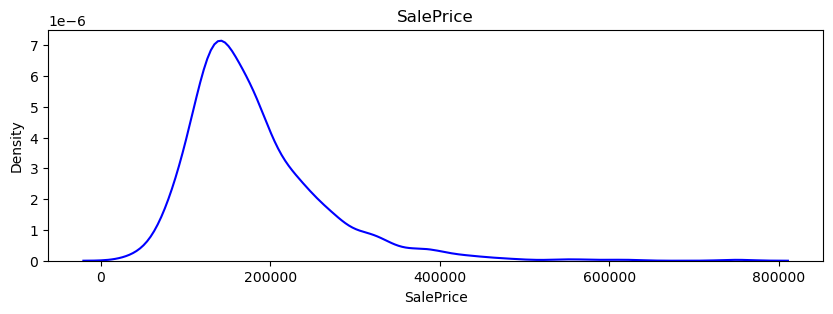

In [113]:
# Plotting (target) variable
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,3))
sns.kdeplot(data=xy_train, x='SalePrice', color='blue')
title = plt.title("SalePrice")

In [114]:
print(round(xy_train['SalePrice'].describe()))

count      1460.0
mean     180921.0
std       79443.0
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64


<a name='2.1.2'></a>
### 2.1.2 Independent/Response Variables

<a name='2.1.2.1'></a>
#### 2.1.2.1 Quantitative/Numerical Variables

There is so many data value = 0 in numerical variables, i will try to compare the variables graph with and without 0 value.

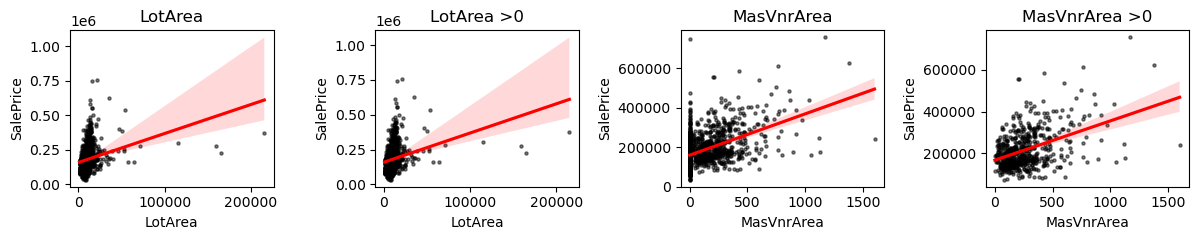

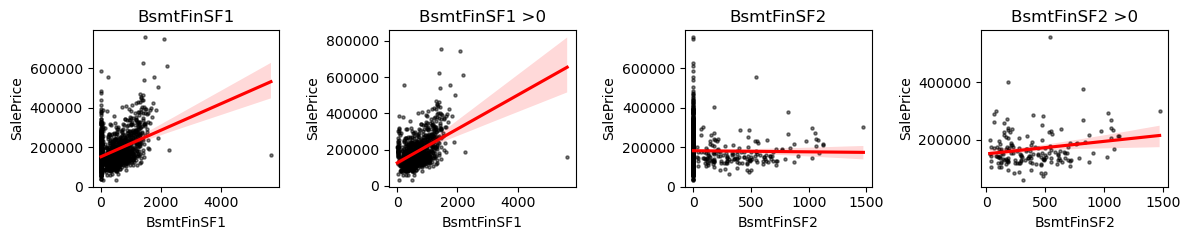

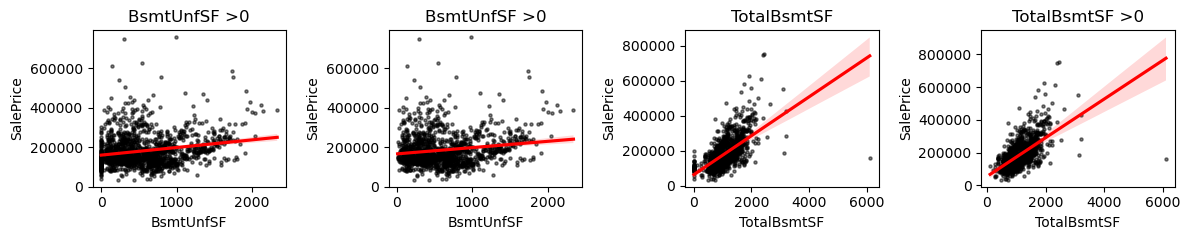

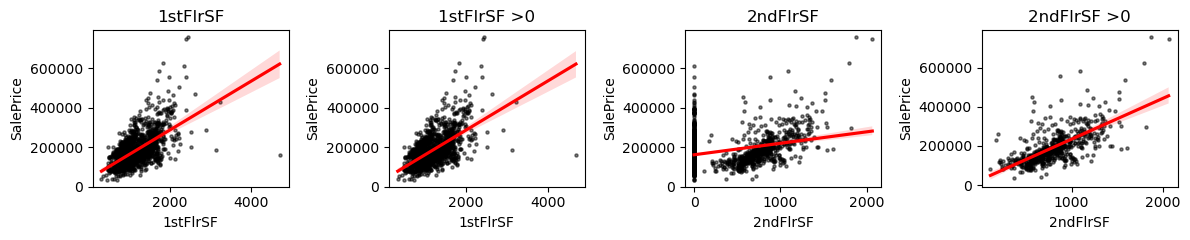

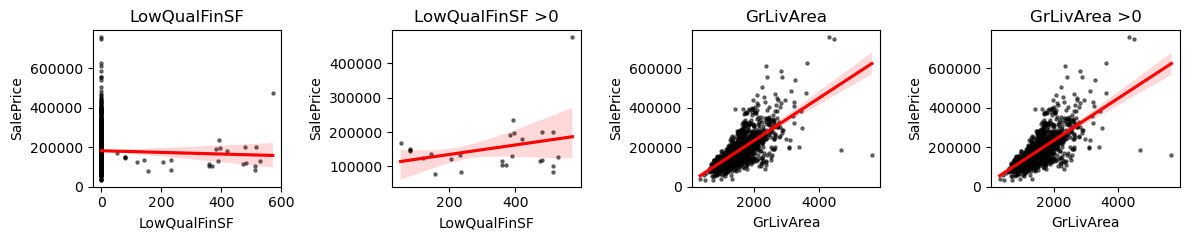

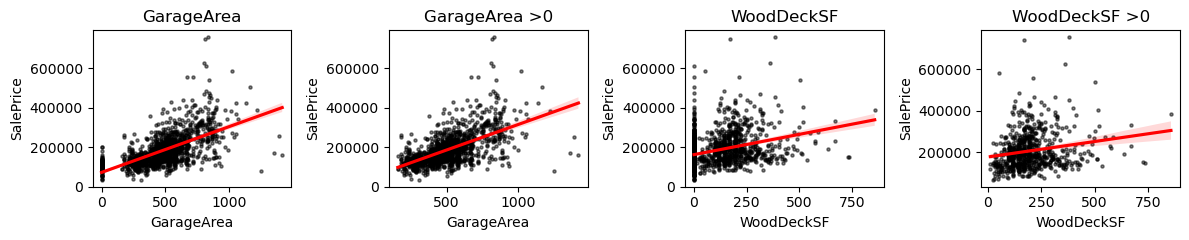

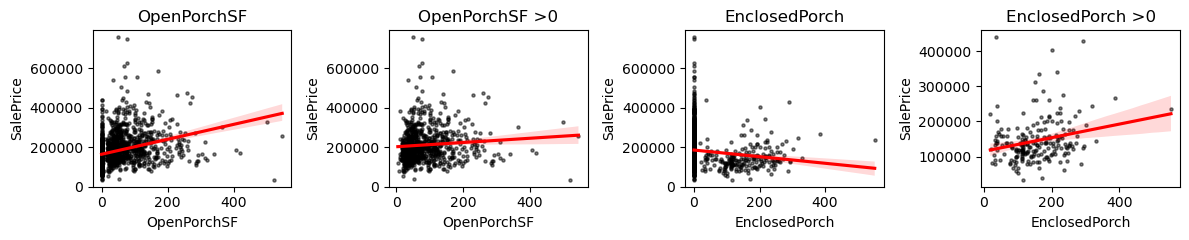

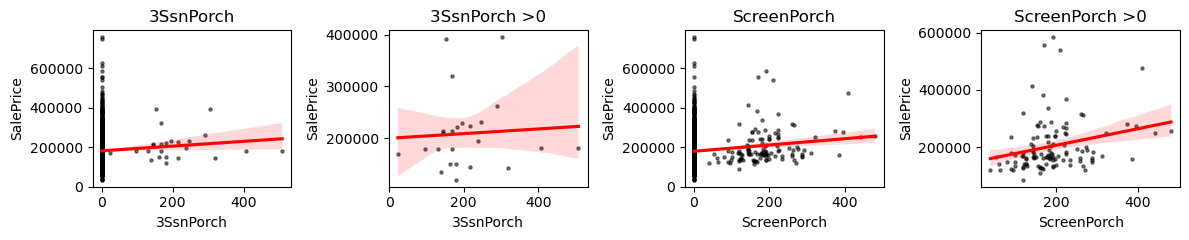

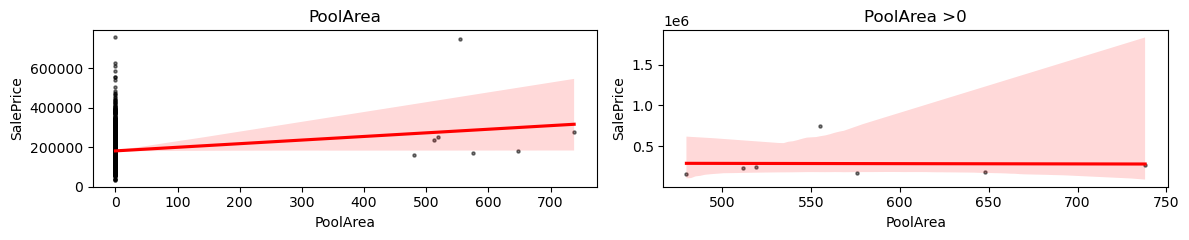

In [115]:
# Plotting variables
#1ST ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=xy_train, x='LotArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("LotArea")

plt.subplot(1,4,2)
sns.regplot(data=xy_train.loc[xy_train['LotArea']>0], x='LotArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("LotArea >0")

plt.subplot(1,4,3)
sns.regplot(data=xy_train, x='MasVnrArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("MasVnrArea")

plt.subplot(1,4,4)
sns.regplot(data=xy_train.loc[xy_train['MasVnrArea']>0], x='MasVnrArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("MasVnrArea >0")
fig.tight_layout()

#2ND ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=xy_train, x='BsmtFinSF1', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("BsmtFinSF1")

plt.subplot(1,4,2)
sns.regplot(data=xy_train.loc[xy_train['BsmtFinSF1']>0], x='BsmtFinSF1', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("BsmtFinSF1 >0")

plt.subplot(1,4,3)
sns.regplot(data=xy_train, x='BsmtFinSF2', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("BsmtFinSF2")

plt.subplot(1,4,4)
sns.regplot(data=xy_train.loc[xy_train['BsmtFinSF2']>0], x='BsmtFinSF2', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("BsmtFinSF2 >0")
fig.tight_layout()

#3RD ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=xy_train, x='BsmtUnfSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("BsmtUnfSF >0")

plt.subplot(1,4,2)
sns.regplot(data=xy_train.loc[xy_train['BsmtUnfSF']>0], x='BsmtUnfSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("BsmtUnfSF >0")

plt.subplot(1,4,3)
sns.regplot(data=xy_train, x='TotalBsmtSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("TotalBsmtSF")

plt.subplot(1,4,4)
sns.regplot(data=xy_train.loc[xy_train['TotalBsmtSF']>0], x='TotalBsmtSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("TotalBsmtSF >0")
fig.tight_layout()

#4TH ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=xy_train, x='1stFlrSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("1stFlrSF")

plt.subplot(1,4,2)
sns.regplot(data=xy_train.loc[xy_train['1stFlrSF']>0], x='1stFlrSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("1stFlrSF >0")

plt.subplot(1,4,3)
sns.regplot(data=xy_train, x='2ndFlrSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("2ndFlrSF")

plt.subplot(1,4,4)
sns.regplot(data=xy_train.loc[xy_train['2ndFlrSF']>0], x='2ndFlrSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("2ndFlrSF >0")
fig.tight_layout()

#5RD ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=xy_train, x='LowQualFinSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("LowQualFinSF")

plt.subplot(1,4,2)
sns.regplot(data=xy_train.loc[xy_train['LowQualFinSF']>0], x='LowQualFinSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("LowQualFinSF >0")

plt.subplot(1,4,3)
sns.regplot(data=xy_train, x='GrLivArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("GrLivArea")

plt.subplot(1,4,4)
sns.regplot(data=xy_train.loc[xy_train['GrLivArea']>0], x='GrLivArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("GrLivArea >0")
fig.tight_layout()

#6TH ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=xy_train, x='GarageArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("GarageArea")

plt.subplot(1,4,2)
sns.regplot(data=xy_train.loc[xy_train['GarageArea']>0], x='GarageArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("GarageArea >0")

plt.subplot(1,4,3)
sns.regplot(data=xy_train, x='WoodDeckSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("WoodDeckSF")

plt.subplot(1,4,4)
sns.regplot(data=xy_train.loc[xy_train['WoodDeckSF']>0], x='WoodDeckSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("WoodDeckSF >0")
fig.tight_layout()

#7TH ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=xy_train, x='OpenPorchSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("OpenPorchSF")

plt.subplot(1,4,2)
sns.regplot(data=xy_train.loc[xy_train['OpenPorchSF']>0], x='OpenPorchSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("OpenPorchSF >0")

plt.subplot(1,4,3)
sns.regplot(data=xy_train, x='EnclosedPorch', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("EnclosedPorch")

plt.subplot(1,4,4)
sns.regplot(data=xy_train.loc[xy_train['EnclosedPorch']>0], x='EnclosedPorch', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("EnclosedPorch >0")
fig.tight_layout()

#8TH ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=xy_train, x='3SsnPorch', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("3SsnPorch")

plt.subplot(1,4,2)
sns.regplot(data=xy_train.loc[xy_train['3SsnPorch']>0], x='3SsnPorch', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("3SsnPorch >0")

plt.subplot(1,4,3)
sns.regplot(data=xy_train, x='ScreenPorch', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("ScreenPorch")

plt.subplot(1,4,4)
sns.regplot(data=xy_train.loc[xy_train['ScreenPorch']>0], x='ScreenPorch', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("ScreenPorch >0")
fig.tight_layout()

#8TH ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,2,1)
sns.regplot(data=xy_train, x='PoolArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("PoolArea")

plt.subplot(1,2,2)
sns.regplot(data=xy_train.loc[xy_train['PoolArea']>0], x='PoolArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("PoolArea >0")
fig.tight_layout()

As we can see the difference between the whole value and the aggregated without 0 value from the graph:
        
    - Relatively the same:
        ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', 'GrLivArea', 'GarageArea', '3SsnPorch']
    - Slightly different:
         ['BsmtFinSF1', 'ScreenPorch', 'WoodDeckSF']
    - Very different:
        ['2ndFlrSF', 'OpenPorchSF']
    - Extremely different:
        ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch'] from negative to positive
        ['PoolArea'] from positive to negative

The action we are gonna do is this:

    Keep the original feature in 'Relatively the same' variables
    Add a new binary feature and keep the original feature in 'Slightly different' variables
    Add a new binary feature and delete the original feature in 'Very and Extremely different' variables

In [116]:
# Feature extraction
printmd("**feature extraction**", color="#08FC84")
printmd("**before**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

#CONVERT THIS NOMINAL VARIABLE TO BINARY VARIABLE THEN CONVERT TO NUMERICAL VALUE WITH ONE-HOT ENCODER
for data in x_cleaner:
    #SLIGHTLY DIFFERENT
    # (1) Discretizing current feature (['BsmtFinSF1'].unique() == ['BsmtFinSF1_no','BsmtFinSF1_yes])
    # (1) Adding new features (One-Hot Encoding) (['BsmtFinSF1'] to [['BsmtFinSF1_no','BsmtFinSF1_yes']])
    # (2) Discretizing current feature (['ScreenPorch'].unique() == ['ScreenPorch_no','ScreenPorch_yes])
    # (2) Adding new features (One-Hot Encoding) (['ScreenPorch'] to [['ScreenPorch_no','ScreenPorch_yes']])
    # (3) Discretizing current feature (['WoodDeckSF'].unique() == ['WoodDeckSF_no','WoodDeckSF_yes])
    # (3) Adding new features (One-Hot Encoding) (['WoodDeckSF'] to [['WoodDeckSF_no','WoodDeckSF_yes']])
    data['BsmtFinSF1_no']=(data['BsmtFinSF1']==0).astype(int)
    data['BsmtFinSF1_yes']=(data['BsmtFinSF1']>0).astype(int)
    data['ScreenPorch_no']=(data['ScreenPorch']==0).astype(int)
    data['ScreenPorch_yes']=(data['ScreenPorch']>0).astype(int)
    data['WoodDeckSF_no']=(data['WoodDeckSF']==0).astype(int)
    data['WoodDeckSF_yes']=(data['WoodDeckSF']>0).astype(int)
    
    #VERY DIFFERENT
    # (1) Discretizing current feature (['2ndFlrSF'].unique() == ['2ndFlrSF_no','2ndFlrSF_yes])
    # (1) Adding new features (One-Hot Encoding) (['2ndFlrSF'] to [['2ndFlrSF_no','2ndFlrSF_yes']])
    # (2) Discretizing current feature (['OpenPorchSF'].unique() == ['OpenPorchSF_no','OpenPorchSF_yes])
    # (2) Adding new features (One-Hot Encoding) (['OpenPorchSF'] to [['OpenPorchSF_no','OpenPorchSF_yes']])
    data['2ndFlrSF_no']=(data['2ndFlrSF']==0).astype(int)
    data['2ndFlrSF_yes']=(data['2ndFlrSF']>0).astype(int)
    data['OpenPorchSF_no']=(data['OpenPorchSF']==0).astype(int)
    data['OpenPorchSF_yes']=(data['OpenPorchSF']>0).astype(int)
    # (3) Dropping current feature ('2ndFlrSF')
    # (4) Dropping current feature ('OpenPorchSF')
    data.drop('2ndFlrSF', axis=1, inplace=True)
    data.drop('OpenPorchSF', axis=1, inplace=True)

    #EXTREMELY DIFFERENT
    # (1) Discretizing current feature (['BsmtFinSF2'].unique() == ['BsmtFinSF2_no','BsmtFinSF2_yes])
    # (1) Adding new features (One-Hot Encoding) (['BsmtFinSF2'] to [['BsmtFinSF2_no','BsmtFinSF2_yes']])
    # (2) Discretizing current feature (['LowQualFinSF'].unique() == ['LowQualFinSF_no','LowQualFinSF_yes])
    # (2) Adding new features (One-Hot Encoding) (['LowQualFinSF'] to [['LowQualFinSF_no','LowQualFinSF_yes']])
    # (3) Discretizing current feature (['EnclosedPorch'].unique() == ['EnclosedPorch_no','EnclosedPorch_yes])
    # (3) Adding new features (One-Hot Encoding) (['EnclosedPorch'] to [['EnclosedPorch_no','EnclosedPorch_yes']])
    # (4) Discretizing current feature (['PoolArea'].unique() == ['PoolArea_no','PoolArea_yes])
    # (4) Adding new features (One-Hot Encoding) (['PoolArea'] to [['PoolArea_no','PoolArea_yes']])    
    data['BsmtFinSF2_no']=(data['BsmtFinSF2']==0).astype(int)
    data['BsmtFinSF2_yes']=(data['BsmtFinSF2']>0).astype(int)
    data['LowQualFinSF_no']=(data['LowQualFinSF']==0).astype(int)
    data['LowQualFinSF_yes']=(data['LowQualFinSF']>0).astype(int)
    data['EnclosedPorch_no']=(data['EnclosedPorch']==0).astype(int)
    data['EnclosedPorch_yes']=(data['EnclosedPorch']>0).astype(int)
    data['PoolArea_no']=(data['PoolArea']==0).astype(int)
    data['PoolArea_yes']=(data['PoolArea']>0).astype(int)
    # (5) Dropping current feature ['BsmtFinSF2']
    # (6) Dropping current feature ['LowQualFinSF']
    # (7) Dropping current feature ['EnclosedPorch']
    # (8) Dropping current feature ['PoolArea']
    data.drop('BsmtFinSF2', axis=1, inplace=True)
    data.drop('LowQualFinSF', axis=1, inplace=True)
    data.drop('EnclosedPorch', axis=1, inplace=True)
    data.drop('PoolArea', axis=1, inplace=True)

printmd("**after**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

<span style='color:#08FC84'>**feature extraction**</span>

<span style='color:#0804FC'>**before**</span>

xy_train:  (1460, 75)
x_test:  (1459, 74)


<span style='color:#0804FC'>**after**</span>

xy_train:  (1460, 87)
x_test:  (1459, 86)


ADD: 18

    ['BsmtFinSF1_no', 'BsmtFinSF1_yes', 'ScreenPorch_no', 'ScreenPorch_yes', 'WoodDeckSF_no', 'WoodDeckSF_yes', '2ndFlrSF_no', '2ndFlrSF_yes', 'OpenPorchSF_no', 'OpenPorchSF_yes', 'BsmtFinSF2_no', 'BsmtFinSF2_yes', 'LowQualFinSF_no', 'LowQualFinSF_yes', 'EnclosedPorch_no', 'EnclosedPorch_yes', 'PoolArea_no', 'PoolArea_yes']

DELETE: 6

    ['2ndFlrSF', 'OpenPorchSF', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', 'PoolArea']

In [117]:
# Missing values
printmd("**missing value**", color="#08FC84")
printmd("**before**", color="#0804FC")
m_train = pd.DataFrame({'x_train(Σ)': xy_train.isnull().sum(),'x_train(%)': xy_train.isnull().sum() / len(x_train) * 100})
m_train = m_train[m_train['x_train(Σ)'] > 0]
m_train.sort_values(by='x_train(Σ)', ascending=False, inplace=True)
print(f"There are {m_train.shape[0]} features having missing data in training set.")
m_test = pd.DataFrame({'x_test(Σ)': x_test.isnull().sum(),'x_test(%)': x_test.isnull().sum() / len(x_test) * 100})
m_test = m_test[m_test['x_test(Σ)'] > 0]
m_test.sort_values(by='x_test(Σ)', ascending=False, inplace=True)
print(f"There are {m_test.shape[0]} features having missing data in test set.")
missing = pd.concat([m_train, m_test], axis=1)
print(missing)

# Filling missing values (mean)
for data in x_cleaner:
    data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
    data['BsmtFullBath'] = data['BsmtFullBath'].fillna(data['BsmtFullBath'].mean())
    data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].mean())
    data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mean())
    data['BsmtUnfSF'] = data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].mean())
    data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean())
    data['GarageCars'] = data['GarageCars'].fillna(data['GarageCars'].mean())
    data['GarageArea'] = data['GarageArea'].fillna(data['GarageArea'].mean())

printmd("**after**", color="#0804FC")
m_train = pd.DataFrame({'x_train(Σ)': xy_train.isnull().sum(),'x_train(%)': xy_train.isnull().sum() / len(x_train) * 100})
m_train = m_train[m_train['x_train(Σ)'] > 0]
m_train.sort_values(by='x_train(Σ)', ascending=False, inplace=True)
print(f"There are {m_train.shape[0]} features having missing data in training set.")
m_test = pd.DataFrame({'x_test(Σ)': x_test.isnull().sum(),'x_test(%)': x_test.isnull().sum() / len(x_test) * 100})
m_test = m_test[m_test['x_test(Σ)'] > 0]
m_test.sort_values(by='x_test(Σ)', ascending=False, inplace=True)
print(f"There are {m_test.shape[0]} features having missing data in test set.")
missing = pd.concat([m_train, m_test], axis=1)
print(missing)

<span style='color:#08FC84'>**missing value**</span>

<span style='color:#0804FC'>**before**</span>

There are 13 features having missing data in training set.
There are 26 features having missing data in test set.
              x_train(Σ)  x_train(%)  x_test(Σ)  x_test(%)
MasVnrType         872.0   59.726027      894.0  61.274846
GarageType          81.0    5.547945       76.0   5.209047
GarageYrBlt         81.0    5.547945       78.0   5.346127
GarageFinish        81.0    5.547945       78.0   5.346127
GarageQual          81.0    5.547945       78.0   5.346127
GarageCond          81.0    5.547945       78.0   5.346127
BsmtExposure        38.0    2.602740       44.0   3.015764
BsmtFinType2        38.0    2.602740       42.0   2.878684
BsmtQual            37.0    2.534247       44.0   3.015764
BsmtCond            37.0    2.534247       45.0   3.084304
BsmtFinType1        37.0    2.534247       42.0   2.878684
MasVnrArea           8.0    0.547945       15.0   1.028101
Electrical           1.0    0.068493        NaN        NaN
MSZoning             NaN         NaN        4.0   0.274160
U

<span style='color:#0804FC'>**after**</span>

There are 12 features having missing data in training set.
There are 18 features having missing data in test set.
              x_train(Σ)  x_train(%)  x_test(Σ)  x_test(%)
MasVnrType         872.0   59.726027      894.0  61.274846
GarageType          81.0    5.547945       76.0   5.209047
GarageYrBlt         81.0    5.547945       78.0   5.346127
GarageFinish        81.0    5.547945       78.0   5.346127
GarageQual          81.0    5.547945       78.0   5.346127
GarageCond          81.0    5.547945       78.0   5.346127
BsmtExposure        38.0    2.602740       44.0   3.015764
BsmtFinType2        38.0    2.602740       42.0   2.878684
BsmtQual            37.0    2.534247       44.0   3.015764
BsmtCond            37.0    2.534247       45.0   3.084304
BsmtFinType1        37.0    2.534247       42.0   2.878684
Electrical           1.0    0.068493        NaN        NaN
MSZoning             NaN         NaN        4.0   0.274160
Functional           NaN         NaN        2.0   0.137080
U

<a name='2.1.2.2'></a>
#### 2.1.2.2 Qualitative/Categorical Variables

In [118]:
#1ST ROW ['MSZoning', 'LotShape', 'LandContour', 'LotConfig]
#2ND ROW ['LandSlope', 'Condition1', 'Condition2', 'BldgType']
#3RD ROW ['HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType']
#4TH ROW ['ExterQual', 'ExterCond', 'Foundation', 'BsmtQual']
#5TH ROW ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
#6TH ROW ['Heating', 'HeatingQC', 'Electrical', 'KitchenQual']
#7TH ROW ['Functional', 'GarageType', 'GarageFinish', 'GarageQual']
#8TH ROW ['GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
#9TH ROW ['Street', 'Utilities', 'CentralAir']

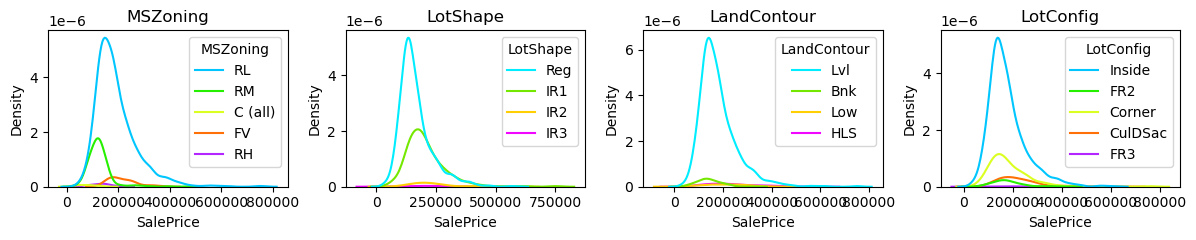

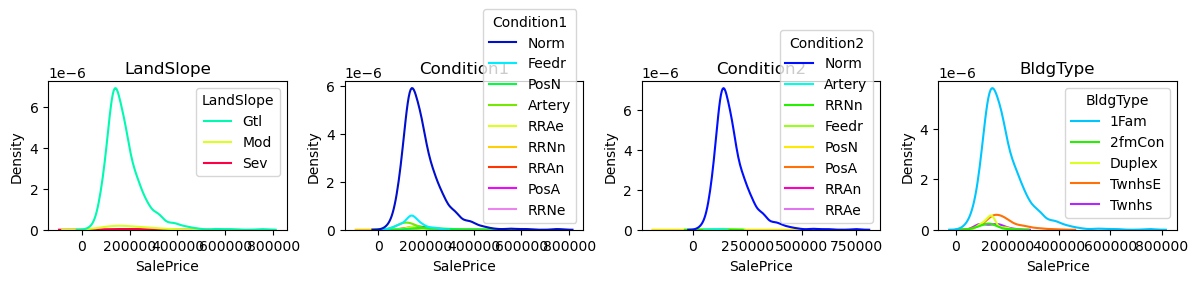

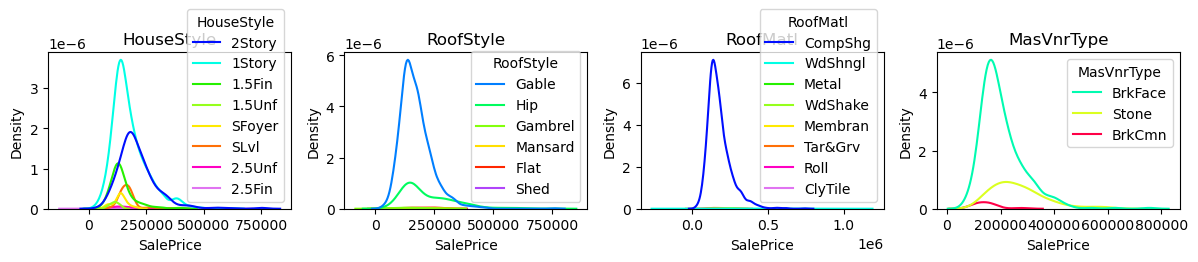

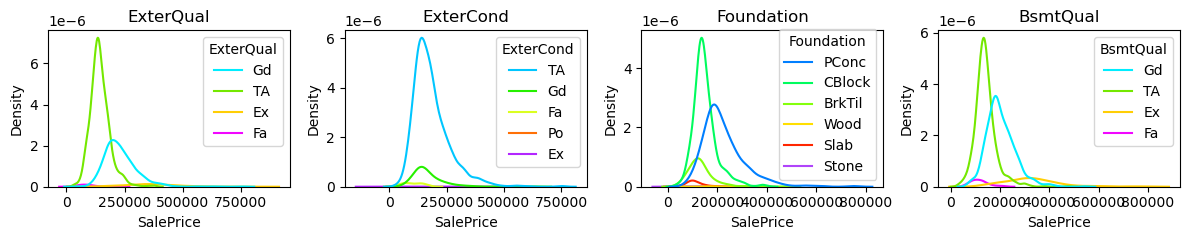

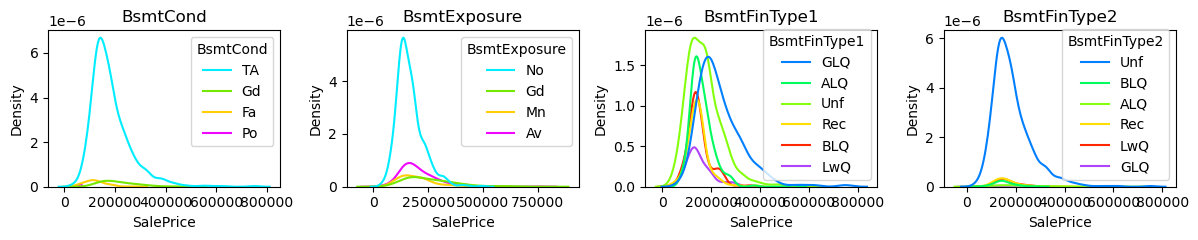

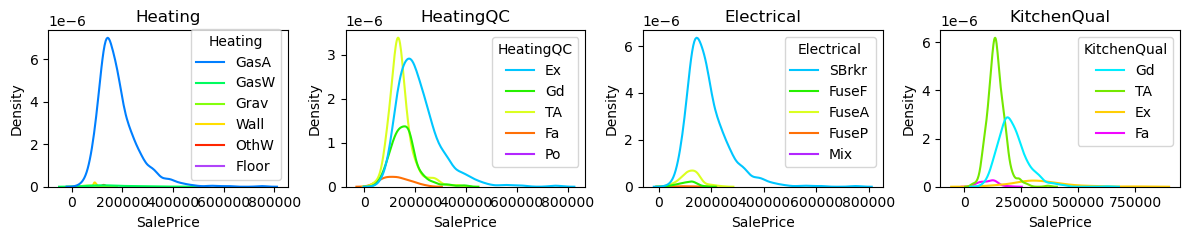

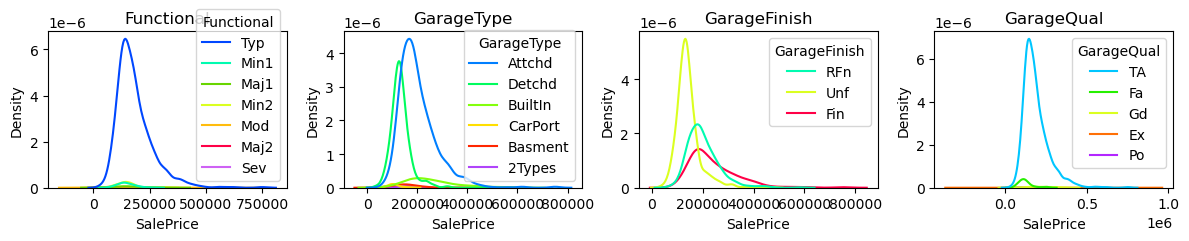

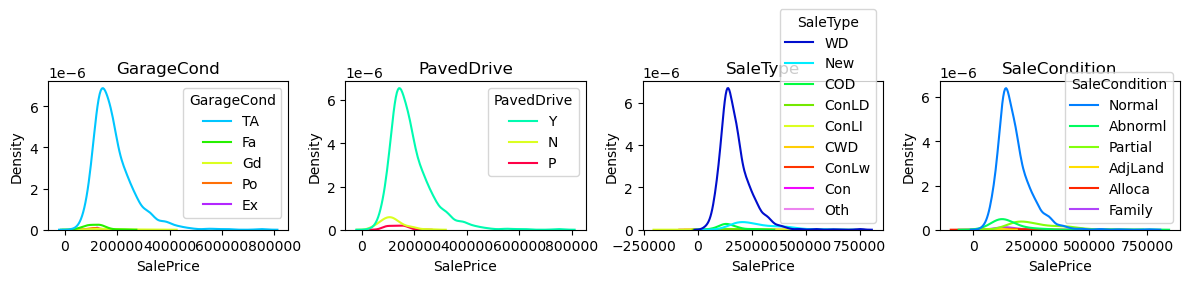

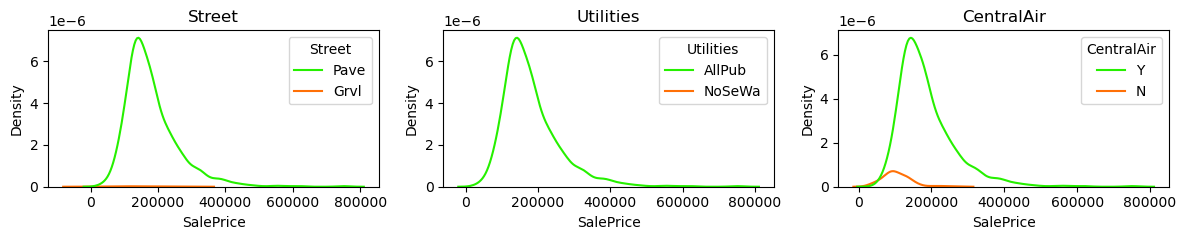

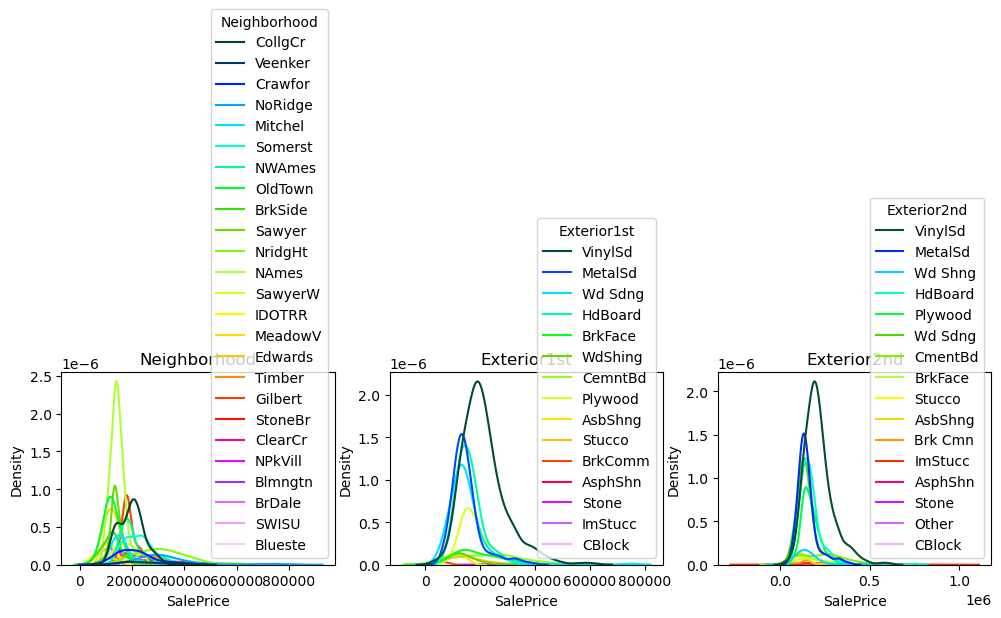

In [119]:
# Plotting current features
#1ST ROW ['MSZoning', 'LotShape', 'LandContour', 'LotConfig]
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.kdeplot(data=xy_train, x='SalePrice', hue='MSZoning', palette='gist_ncar')
title = plt.title("MSZoning")

plt.subplot(1,4,2)
sns.kdeplot(data=xy_train, x='SalePrice', hue='LotShape', palette='gist_ncar')
title = plt.title("LotShape")

plt.subplot(1,4,3)
sns.kdeplot(data=xy_train, x='SalePrice', hue='LandContour', palette='gist_ncar')
title = plt.title("LandContour")

plt.subplot(1,4,4)
sns.kdeplot(data=xy_train, x='SalePrice', hue='LotConfig', palette='gist_ncar')
title = plt.title("LotConfig")
fig.tight_layout()

#2ND ROW ['LandSlope', 'Condition1', 'Condition2', 'BldgType']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.kdeplot(data=xy_train, x='SalePrice', hue='LandSlope', palette='gist_ncar')
title = plt.title("LandSlope")

plt.subplot(1,4,2)
sns.kdeplot(data=xy_train, x='SalePrice', hue='Condition1', palette='gist_ncar')
title = plt.title("Condition1")

plt.subplot(1,4,3)
sns.kdeplot(data=xy_train, x='SalePrice', hue='Condition2', palette='gist_ncar')
title = plt.title("Condition2")

plt.subplot(1,4,4)
sns.kdeplot(data=xy_train, x='SalePrice', hue='BldgType', palette='gist_ncar')
title = plt.title("BldgType")
fig.tight_layout()

#3RD ROW ['HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.kdeplot(data=xy_train, x='SalePrice', hue='HouseStyle', palette='gist_ncar')
title = plt.title("HouseStyle")

plt.subplot(1,4,2)
sns.kdeplot(data=xy_train, x='SalePrice', hue='RoofStyle', palette='gist_ncar')
title = plt.title("RoofStyle")

plt.subplot(1,4,3)
sns.kdeplot(data=xy_train, x='SalePrice', hue='RoofMatl', palette='gist_ncar')
title = plt.title("RoofMatl")

plt.subplot(1,4,4)
sns.kdeplot(data=xy_train, x='SalePrice', hue='MasVnrType', palette='gist_ncar')
title = plt.title("MasVnrType")
fig.tight_layout()

#4TH ROW ['ExterQual', 'ExterCond', 'Foundation', 'BsmtQual']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.kdeplot(data=xy_train, x='SalePrice', hue='ExterQual', palette='gist_ncar')
title = plt.title("ExterQual")

plt.subplot(1,4,2)
sns.kdeplot(data=xy_train, x='SalePrice', hue='ExterCond', palette='gist_ncar')
title = plt.title("ExterCond")

plt.subplot(1,4,3)
sns.kdeplot(data=xy_train, x='SalePrice', hue='Foundation', palette='gist_ncar')
title = plt.title("Foundation")

plt.subplot(1,4,4)
sns.kdeplot(data=xy_train, x='SalePrice', hue='BsmtQual', palette='gist_ncar')
title = plt.title("BsmtQual")
fig.tight_layout()

#5TH ROW ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.kdeplot(data=xy_train, x='SalePrice', hue='BsmtCond', palette='gist_ncar')
title = plt.title("BsmtCond")

plt.subplot(1,4,2)
sns.kdeplot(data=xy_train, x='SalePrice', hue='BsmtExposure', palette='gist_ncar')
title = plt.title("BsmtExposure")

plt.subplot(1,4,3)
sns.kdeplot(data=xy_train, x='SalePrice', hue='BsmtFinType1', palette='gist_ncar')
title = plt.title("BsmtFinType1")

plt.subplot(1,4,4)
sns.kdeplot(data=xy_train, x='SalePrice', hue='BsmtFinType2', palette='gist_ncar')
title = plt.title("BsmtFinType2")
fig.tight_layout()

#6TH ROW ['Heating', 'HeatingQC', 'Electrical', 'KitchenQual']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.kdeplot(data=xy_train, x='SalePrice', hue='Heating', palette='gist_ncar')
title = plt.title("Heating")

plt.subplot(1,4,2)
sns.kdeplot(data=xy_train, x='SalePrice', hue='HeatingQC', palette='gist_ncar')
title = plt.title("HeatingQC")

plt.subplot(1,4,3)
sns.kdeplot(data=xy_train, x='SalePrice', hue='Electrical', palette='gist_ncar')
title = plt.title("Electrical")

plt.subplot(1,4,4)
sns.kdeplot(data=xy_train, x='SalePrice', hue='KitchenQual', palette='gist_ncar')
title = plt.title("KitchenQual")
fig.tight_layout()

#7TH ROW ['Functional', 'GarageType', 'GarageFinish', 'GarageQual']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.kdeplot(data=xy_train, x='SalePrice', hue='Functional', palette='gist_ncar')
title = plt.title("Functional")

plt.subplot(1,4,2)
sns.kdeplot(data=xy_train, x='SalePrice', hue='GarageType', palette='gist_ncar')
title = plt.title("GarageType")

plt.subplot(1,4,3)
sns.kdeplot(data=xy_train, x='SalePrice', hue='GarageFinish', palette='gist_ncar')
title = plt.title("GarageFinish")

plt.subplot(1,4,4)
sns.kdeplot(data=xy_train, x='SalePrice', hue='GarageQual', palette='gist_ncar')
title = plt.title("GarageQual")
fig.tight_layout()

#8TH ROW ['GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.kdeplot(data=xy_train, x='SalePrice', hue='GarageCond', palette='gist_ncar')
title = plt.title("GarageCond")

plt.subplot(1,4,2)
sns.kdeplot(data=xy_train, x='SalePrice', hue='PavedDrive', palette='gist_ncar')
title = plt.title("PavedDrive")

plt.subplot(1,4,3)
sns.kdeplot(data=xy_train, x='SalePrice', hue='SaleType', palette='gist_ncar')
title = plt.title("SaleType")

plt.subplot(1,4,4)
sns.kdeplot(data=xy_train, x='SalePrice', hue='SaleCondition', palette='gist_ncar')
title = plt.title("SaleCondition")
fig.tight_layout()

#9TH ROW ['Street', 'Utilities', 'CentralAir']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,3,1)
sns.kdeplot(data=xy_train, x='SalePrice', hue='Street', palette='gist_ncar')
title = plt.title("Street")

plt.subplot(1,3,2)
sns.kdeplot(data=xy_train, x='SalePrice', hue='Utilities', palette='gist_ncar')
title = plt.title("Utilities")

plt.subplot(1,3,3)
sns.kdeplot(data=xy_train, x='SalePrice', hue='CentralAir', palette='gist_ncar')
title = plt.title("CentralAir")
fig.tight_layout()

#10TH ROW ['Neighborhood', 'Exterior1st', 'Exterior2nd']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,3,1)
sns.kdeplot(data=xy_train, x='SalePrice', hue='Neighborhood', palette='gist_ncar')
title = plt.title("Neighborhood")

plt.subplot(1,3,2)
sns.kdeplot(data=xy_train, x='SalePrice', hue='Exterior1st', palette='gist_ncar')
title = plt.title("Exterior1st")

plt.subplot(1,3,3)
sns.kdeplot(data=xy_train, x='SalePrice', hue='Exterior2nd', palette='gist_ncar')
title = plt.title("Exterior2nd")
fig.tight_layout()

In [120]:
print(xy_train['Street'].value_counts())
print(x_test['Street'].value_counts())
print(xy_train['Utilities'].value_counts())
print(x_test['Utilities'].value_counts())

Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Street
Pave    1453
Grvl       6
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
Utilities
AllPub    1457
Name: count, dtype: int64


From the graphs, we can see that ['Street', 'Utilities'] has a unique pattern, but the value extremely distributed into one value, more than 99% of the values. We need to drop these variables since will not help our prediction

In [121]:
# Features extraction
printmd("**feature extraction**", color="#08FC84")
printmd("**before**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

# Dropping ['Street', 'Utilities'] variables
for data in x_cleaner:
    data.drop('Street', axis=1, inplace=True)
    data.drop('Utilities', axis=1, inplace=True)

printmd("**after**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

<span style='color:#08FC84'>**feature extraction**</span>

<span style='color:#0804FC'>**before**</span>

xy_train:  (1460, 87)
x_test:  (1459, 86)


<span style='color:#0804FC'>**after**</span>

xy_train:  (1460, 85)
x_test:  (1459, 84)


In [122]:
#1ST ROW ['MSZoning', 'LotShape', 'LandContour', 'LotConfig']
#2ND ROW ['LandSlope', 'Condition1', 'Condition2', 'BldgType']
#3RD ROW ['HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType']
#4TH ROW ['ExterQual', 'ExterCond', 'Foundation', 'BsmtQual']
#5TH ROW ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
#6TH ROW ['Heating', 'HeatingQC', 'Electrical', 'KitchenQual']
#7TH ROW ['Functional', 'GarageType', 'GarageFinish', 'GarageQual']
#8TH ROW ['GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
#9TH ROW ['Street', 'Utilities', 'CentralAir']

In [123]:
print(len(xy_train['MSZoning'].value_counts()))
print(len(x_test['MSZoning'].value_counts()))
print(len(xy_train['LotShape'].value_counts()))
print(len(x_test['LotShape'].value_counts()))
print(len(xy_train['LandContour'].value_counts()))
print(len(x_test['LandContour'].value_counts()))
print(len(xy_train['LotConfig'].value_counts()))
print(len(x_test['LotConfig'].value_counts()), "\n")

print(len(xy_train['LandSlope'].value_counts()))
print(len(x_test['LandSlope'].value_counts()))
print(len(xy_train['Condition1'].value_counts()))
print(len(x_test['Condition1'].value_counts()))
print(len(xy_train['Condition2'].value_counts()))
print(len(x_test['Condition2'].value_counts()))
print(len(xy_train['BldgType'].value_counts()))
print(len(x_test['BldgType'].value_counts()), "\n")

print(len(xy_train['HouseStyle'].value_counts()))
print(len(x_test['HouseStyle'].value_counts()))
print(len(xy_train['RoofStyle'].value_counts()))
print(len(x_test['RoofStyle'].value_counts()))
print(len(xy_train['RoofMatl'].value_counts()))
print(len(x_test['RoofMatl'].value_counts()))
print(len(xy_train['MasVnrType'].value_counts()))
print(len(x_test['MasVnrType'].value_counts()), "\n")

print(len(xy_train['ExterQual'].value_counts()))
print(len(x_test['ExterQual'].value_counts()))
print(len(xy_train['ExterCond'].value_counts()))
print(len(x_test['ExterCond'].value_counts()))
print(len(xy_train['Foundation'].value_counts()))
print(len(x_test['Foundation'].value_counts()))
print(len(xy_train['BsmtQual'].value_counts()))
print(len(x_test['BsmtQual'].value_counts()), "\n")

print(len(xy_train['BsmtCond'].value_counts()))
print(len(x_test['BsmtCond'].value_counts()))
print(len(xy_train['BsmtExposure'].value_counts()))
print(len(x_test['BsmtExposure'].value_counts()))
print(len(xy_train['BsmtFinType1'].value_counts()))
print(len(x_test['BsmtFinType1'].value_counts()))
print(len(xy_train['BsmtFinType2'].value_counts()))
print(len(x_test['BsmtFinType2'].value_counts()), "\n")

print(len(xy_train['Heating'].value_counts()))
print(len(x_test['Heating'].value_counts()))
print(len(xy_train['HeatingQC'].value_counts()))
print(len(x_test['HeatingQC'].value_counts()))
print(len(xy_train['Electrical'].value_counts()))
print(len(x_test['Electrical'].value_counts()))
print(len(xy_train['KitchenQual'].value_counts()))
print(len(x_test['KitchenQual'].value_counts()), "\n")

print(len(xy_train['Functional'].value_counts()))
print(len(x_test['Functional'].value_counts()))
print(len(xy_train['GarageType'].value_counts()))
print(len(x_test['GarageType'].value_counts()))
print(len(xy_train['GarageFinish'].value_counts()))
print(len(x_test['GarageFinish'].value_counts()))
print(len(xy_train['GarageQual'].value_counts()))
print(len(x_test['GarageQual'].value_counts()), "\n")

print(len(xy_train['GarageCond'].value_counts()))
print(len(x_test['GarageCond'].value_counts()))
print(len(xy_train['PavedDrive'].value_counts()))
print(len(x_test['PavedDrive'].value_counts()))
print(len(xy_train['SaleType'].value_counts()))
print(len(x_test['SaleType'].value_counts()))
print(len(xy_train['SaleCondition'].value_counts()))
print(len(x_test['SaleCondition'].value_counts()), "\n")

print(len(xy_train['CentralAir'].value_counts()))
print(len(x_test['CentralAir'].value_counts()), "\n")

print(len(xy_train['Neighborhood'].value_counts()))
print(len(x_test['Neighborhood'].value_counts()))
print(len(xy_train['Exterior1st'].value_counts()))
print(len(x_test['Exterior1st'].value_counts()))
print(len(xy_train['Exterior2nd'].value_counts()))
print(len(x_test['Exterior2nd'].value_counts()))

5
5
4
4
4
4
5
5 

3
3
9
9
8
5
5
5 

8
7
6
6
8
4
3
3 

4
4
5
5
6
6
4
4 

4
4
4
4
6
6
6
6 

6
4
5
5
5
4
4
4 

7
7
6
6
3
3
5
4 

5
5
3
3
9
9
6
6 

2
2 

25
25
15
13
16
15


Now we will convert these categorical variable into numerical variable. In variable who has unique values more than or equal to 10 (high cardinality) I will apply target encoding. In variable who has unique values less than 10 (low cardinality) I will apply one-hot encoding

But first we need to fill the missing values. Since the proportion of the variable missing values are around 2 and 6 percents (under 10 percents). I will replace the missing values with the mode.

In [124]:
# Filling missing values
printmd("**missing value**", color="#08FC84")
printmd("**before**", color="#0804FC")
m_train = pd.DataFrame({'x_train(Σ)': xy_train.isnull().sum(),'x_train(%)': xy_train.isnull().sum() / len(x_train) * 100})
m_train = m_train[m_train['x_train(Σ)'] > 0]
m_train.sort_values(by='x_train(Σ)', ascending=False, inplace=True)
print(f"There are {m_train.shape[0]} features having missing data in training set.")
m_test = pd.DataFrame({'x_test(Σ)': x_test.isnull().sum(),'x_test(%)': x_test.isnull().sum() / len(x_test) * 100})
m_test = m_test[m_test['x_test(Σ)'] > 0]
m_test.sort_values(by='x_test(Σ)', ascending=False, inplace=True)
print(f"There are {m_test.shape[0]} features having missing data in test set.")
missing = pd.concat([m_train, m_test], axis=1)
print(missing)

# Filling missing data with mode
for data in x_cleaner:
    data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
    data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
    data['BsmtQual'] = data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
    data['BsmtCond'] = data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
    data['BsmtExposure'] = data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
    data['BsmtFinType1'] = data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
    data['BsmtFinType2'] = data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
    data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
    data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])
    data['GarageType'] = data['GarageType'].fillna(data['GarageType'].mode()[0])
    data['GarageFinish'] = data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
    data['GarageQual'] = data['GarageQual'].fillna(data['GarageQual'].mode()[0])
    data['GarageCond'] = data['GarageCond'].fillna(data['GarageCond'].mode()[0])
    data['GarageFinish'] = data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
    data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
    data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
    data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
    data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

printmd("**after**", color="#0804FC")
m_train = pd.DataFrame({'x_train(Σ)': xy_train.isnull().sum(),'x_train(%)': xy_train.isnull().sum() / len(x_train) * 100})
m_train = m_train[m_train['x_train(Σ)'] > 0]
m_train.sort_values(by='x_train(Σ)', ascending=False, inplace=True)
print(f"There are {m_train.shape[0]} features having missing data in training set.")
m_test = pd.DataFrame({'x_test(Σ)': x_test.isnull().sum(),'x_test(%)': x_test.isnull().sum() / len(x_test) * 100})
m_test = m_test[m_test['x_test(Σ)'] > 0]
m_test.sort_values(by='x_test(Σ)', ascending=False, inplace=True)
print(f"There are {m_test.shape[0]} features having missing data in test set.")
missing = pd.concat([m_train, m_test], axis=1)
print(missing)

<span style='color:#08FC84'>**missing value**</span>

<span style='color:#0804FC'>**before**</span>

There are 12 features having missing data in training set.
There are 17 features having missing data in test set.
              x_train(Σ)  x_train(%)  x_test(Σ)  x_test(%)
MasVnrType         872.0   59.726027      894.0  61.274846
GarageType          81.0    5.547945       76.0   5.209047
GarageYrBlt         81.0    5.547945       78.0   5.346127
GarageFinish        81.0    5.547945       78.0   5.346127
GarageQual          81.0    5.547945       78.0   5.346127
GarageCond          81.0    5.547945       78.0   5.346127
BsmtExposure        38.0    2.602740       44.0   3.015764
BsmtFinType2        38.0    2.602740       42.0   2.878684
BsmtQual            37.0    2.534247       44.0   3.015764
BsmtCond            37.0    2.534247       45.0   3.084304
BsmtFinType1        37.0    2.534247       42.0   2.878684
Electrical           1.0    0.068493        NaN        NaN
MSZoning             NaN         NaN        4.0   0.274160
Functional           NaN         NaN        2.0   0.137080
K

<span style='color:#0804FC'>**after**</span>

There are 1 features having missing data in training set.
There are 1 features having missing data in test set.
             x_train(Σ)  x_train(%)  x_test(Σ)  x_test(%)
GarageYrBlt          81    5.547945         78   5.346127


<a name='2.1.2.2.1'></a>
##### 2.1.2.2.1 Mass One-Hot Encoding

these variables have unique values differences between the training and test data set

    ['Condition2', 'HouseStyle', 'RoofMatl', 'Heating', 'Electrical', 'GarageQual'],

so we can't use one-hot encoding directly, because the columns generated would'nt be the same

In [125]:
# Feature extraction (One-Hot Encoding)
printmd("**feature extraction**", color="#08FC84")
printmd("**before**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

# Generating new variables using one-hot encoding
xy_train = pd.get_dummies(xy_train, columns = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig',
 'LandSlope', 'Condition1', 'BldgType',
 'RoofStyle', 'MasVnrType',
 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
 'HeatingQC', 'KitchenQual',
 'Functional', 'GarageType', 'GarageFinish', 
'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition',
 'CentralAir'])

# Generating new variables using one-hot encoding
x_test = pd.get_dummies(x_test, columns = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig',
 'LandSlope', 'Condition1', 'BldgType',
 'RoofStyle', 'MasVnrType',
 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
 'HeatingQC', 'KitchenQual',
 'Functional', 'GarageType', 'GarageFinish', 
'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition',
 'CentralAir'])

printmd("**after**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

<span style='color:#08FC84'>**feature extraction**</span>

<span style='color:#0804FC'>**before**</span>

xy_train:  (1460, 85)
x_test:  (1459, 84)


<span style='color:#0804FC'>**after**</span>

xy_train:  (1460, 191)
x_test:  (1459, 190)


<a name='2.1.2.2.2'></a>
##### 2.1.2.2.2 Manual One-Hot Encoding

Manual one-hot encoding for these variables
    
    ['Condition2', 'HouseStyle', 'RoofMatl', 'Heating', 'Electrical', 'GarageQual']

In [135]:
# For doing feature engineering of training and test data at the same time
x_cleaner = [xy_train, x_test]

In [136]:
# Feature extraction (One-Hot Encoding)
printmd("**feature extraction**", color="#08FC84")
printmd("**before**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

for data in x_cleaner:
    # Adding ['Condition2_[VALUE]'] from ['Condition2'] using one-hot encoding
    data['Condition2_Norm']=(data['Condition2']=='Norm').astype(int)
    data['Condition2_Feedr']=(data['Condition2']=='Feedr').astype(int)
    data['Condition2_Artery']=(data['Condition2']=='Artery').astype(int)
    data['Condition2_RRNn']=(data['Condition2']=='RRNn').astype(int)
    data['Condition2_PosN']=(data['Condition2']=='PosN').astype(int)
    data['Condition2_PosA']=(data['Condition2']=='PosA').astype(int)
    data['Condition2_RRAn']=(data['Condition2']=='RRAn').astype(int)
    data['Condition2_RRAe']=(data['Condition2']=='RRAe').astype(int)
    
    # Adding ['HouseStyle_[VALUE]'] from ['HouseStyle'] using one-hot encoding
    data['HouseStyle_1Story']=(data['HouseStyle']=='1Story').astype(int)
    data['HouseStyle_2Story']=(data['HouseStyle']=='2Story').astype(int)
    data['HouseStyle_1.5Fin']=(data['HouseStyle']=='1.5Fin').astype(int)
    data['HouseStyle_SLvl']=(data['HouseStyle']=='SLvl').astype(int)
    data['HouseStyle_SFoyer']=(data['HouseStyle']=='SFoyer').astype(int)
    data['HouseStyle_1.5Un']=(data['HouseStyle']=='1.5Un').astype(int)
    data['HouseStyle_2.5Unf']=(data['HouseStyle']=='2.5Unf').astype(int)
    data['HouseStyle_2.5Fin']=(data['HouseStyle']=='2.5Fin').astype(int)
    
    # Adding ['RoofMatl[VALUE]'] from ['RoofMatl'] using one-hot encoding
    data['RoofMatl_CompShg']=(data['RoofMatl']=='CompShg').astype(int)
    data['RoofMatl_Tar&Grv']=(data['RoofMatl']=='Tar&Grv').astype(int)
    data['RoofMatl_WdShngl']=(data['RoofMatl']=='WdShngl').astype(int)
    data['RoofMatl_WdShake']=(data['RoofMatl']=='WdShake').astype(int)
    data['RoofMatl_Metal']=(data['RoofMatl']=='Metal').astype(int)
    data['RoofMatl_Membran']=(data['RoofMatl']=='Membran').astype(int)
    data['RoofMatl_Roll']=(data['RoofMatl']=='Roll').astype(int)
    data['RoofMatl_ClyTile']=(data['RoofMatl']=='ClyTile').astype(int)    
    
    # Adding ['Heating[VALUE]'] from ['Heating'] using one-hot encoding
    data['Heating_GasA']=(data['Heating']=='GasA').astype(int)
    data['Heating_GasW']=(data['Heating']=='GasW').astype(int)
    data['Heating_Grav']=(data['Heating']=='Grav').astype(int)
    data['Heating_Wall']=(data['Heating']=='Wall').astype(int)
    data['Heating_OthW']=(data['Heating']=='OthW').astype(int)
    data['Heating_Floor']=(data['Heating']=='Floor').astype(int)
    
    # Adding ['Electrical[VALUE]'] from ['Electrical'] using one-hot encoding
    data['Electrical_SBrkr']=(data['Electrical']=='SBrkr').astype(int)
    data['Electrical_FuseA']=(data['Electrical']=='FuseA').astype(int)
    data['Electrical_FuseF']=(data['Electrical']=='FuseF').astype(int)
    data['Electrical_FuseP']=(data['Electrical']=='FuseP').astype(int)
    data['Electrical_Mix']=(data['Electrical']=='Mix').astype(int)
    
    # Adding ['GarageQual[VALUE]'] from ['GarageQual'] using one-hot encoding
    data['GarageQual_TA']=(data['GarageQual']=='TA').astype(int)
    data['GarageQual_Fa']=(data['GarageQual']=='Fa').astype(int)
    data['GarageQual_Gd']=(data['GarageQual']=='Gd').astype(int)
    data['GarageQual_Ex']=(data['GarageQual']=='Ex').astype(int)
    data['GarageQual_Po']=(data['GarageQual']=='Po').astype(int)
    
    # Deleting ['Condition2', 'HouseStyle', 'RoofMatl', 'Heating', 'Electrical', 'GarageQual']
    data.drop('Condition2', axis=1, inplace=True)
    data.drop('HouseStyle', axis=1, inplace=True)
    data.drop('RoofMatl', axis=1, inplace=True)
    data.drop('Heating', axis=1, inplace=True)
    data.drop('Electrical', axis=1, inplace=True)
    data.drop('GarageQual', axis=1, inplace=True)
     
printmd("**after**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

<span style='color:#08FC84'>**feature extraction**</span>

<span style='color:#0804FC'>**before**</span>

xy_train:  (1460, 191)
x_test:  (1459, 190)


<span style='color:#0804FC'>**after**</span>

xy_train:  (1460, 225)
x_test:  (1459, 224)


<a name='2.1.2.3'></a>
#### 2.1.2.3 Descriptive Variables

Other variables:

    ['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

    YearBuilt:     Original construction date
    YearRemodAdd:  Remodel date
    GarageYrBlt:   Year garage was built
    MoSold:        Month Sold
    YrSold:        Year Sold

<a name='2.1.2.3.1'></a>
##### 2.1.2.3.1 ['MoSold']

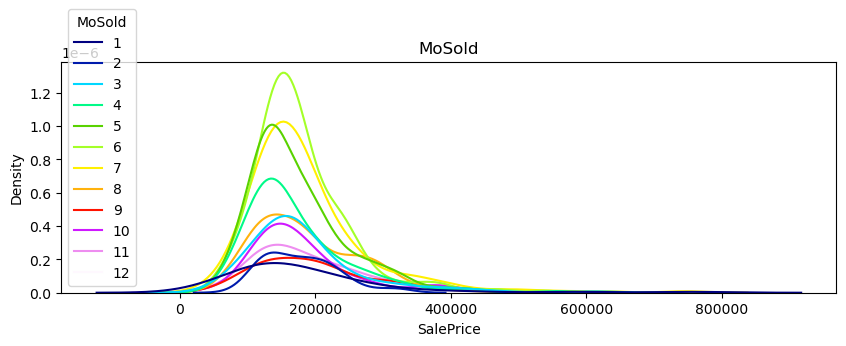

In [137]:
plt.figure(figsize=(10,3))
sns.kdeplot(data=xy_train, x='SalePrice', hue='MoSold', palette='gist_ncar')
title = plt.title("MoSold")

As we can see, the graph has a unique patterns. The months around summer has way higher 'SalesPrice' density than the months around winter. In my notebook, this situation is called 'unique pattern in some certain values'. I will generate new feature that separate the months around summer and winter equally.

<span style='color:#08FC84'>**feature extraction**</span>

<span style='color:#0804FC'>**before**</span>

xy_train:  (1460, 225)
x_test:  (1459, 224)


<span style='color:#0804FC'>**after**</span>

xy_train:  (1460, 227)
x_test:  (1459, 226)


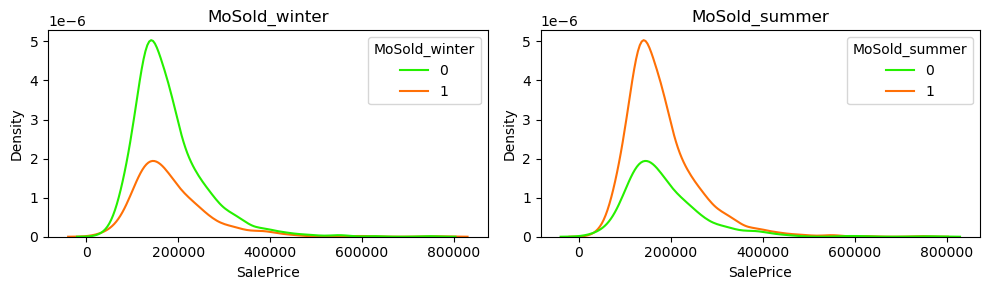

In [138]:
# Feature extraction (Binary -> One-Hot Encoding)
printmd("**feature extraction**", color="#08FC84")
printmd("**before**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

#CONVERT THIS NOMINAL VARIABLE TO BINARY VARIABLE THEN CONVERT TO NUMERICAL VALUE WITH ONE-HOT ENCODER
for data in x_cleaner:
    # Redefining the value to [['MoSold_winter','MoSold_summer']] in ['MoSold']
    # Adding ['MoSold_[Value]'] from ['MoSold'] using one-hot encoding
    data['MoSold_winter']=((data['MoSold']<4) | (data['MoSold']>9)).astype(int)
    data['MoSold_summer']=((data['MoSold']>=4) & (data['MoSold']<=9)).astype(int)

printmd("**after**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

# Plot new variables
fig=plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.kdeplot(data=xy_train, x='SalePrice', hue='MoSold_winter', palette='gist_ncar')
title = plt.title("MoSold_winter")

plt.subplot(1,2,2)
sns.kdeplot(data=xy_train, x='SalePrice', hue='MoSold_summer', palette='gist_ncar')
title = plt.title("MoSold_summer")
fig.tight_layout()

It seems like the average and deviation of 'SalePrice' for winter and summer relatively the same. The big difference between this two binary value is the number of house sales.

<a name='2.1.2.3.2'></a>
##### 2.1.2.3.2 ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

YearBuilt    YearRemodAdd:  Remodel date
    GarageYrBlt:   Year garage was built
    MoSold:        Month Sold
    YrSold:        Year Sold

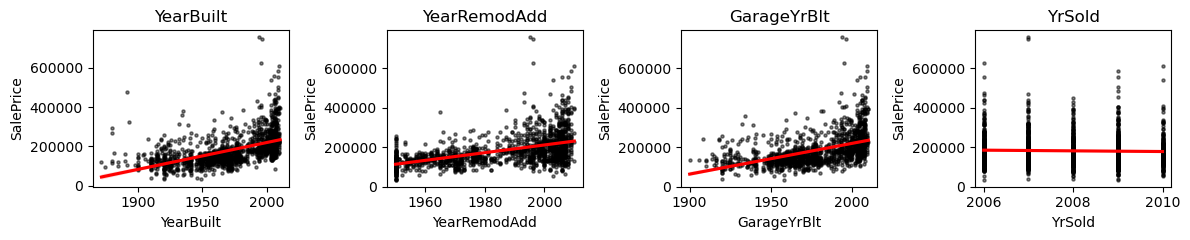

In [139]:
#10TH ROW ['Neighborhood', 'Exterior1st', 'Exterior2nd']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=xy_train, x='YearBuilt', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("YearBuilt")

plt.subplot(1,4,2)
sns.regplot(data=xy_train, x='YearRemodAdd', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("YearRemodAdd")

plt.subplot(1,4,3)
sns.regplot(data=xy_train, x='GarageYrBlt', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("GarageYrBlt")

plt.subplot(1,4,4)
sns.regplot(data=xy_train, x='YrSold', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("YrSold")
fig.tight_layout()

In [140]:
print(xy_train['YearBuilt'].isna().sum())
print(xy_train['YearRemodAdd'].isna().sum())
print(xy_train['GarageYrBlt'].isna().sum())
print(xy_train['YrSold'].isna().sum())

0
0
81
0


Between these 4 variables, only 'GarageYrBlt' who has null value. We need to check if 'GarageYrBlt' is null because some houses do not have a garage or simply just because the data is missing

Check other variables who related to garage:

    GarageType:    Garage location
    GarageYrBlt:   Year garage was built
    GarageFinish:  Interior finish of the garage
    GarageCars:    Size of garage in car capacity
    GarageArea:    Size of garage in square feet
    GarageQual:    Garage quality
    GarageCond:    Garage condition

In ['GarageCars'] and ['GarageArea'] variables there is only one missing data. So we could conclude that the null value in the ['GarageYrBlt'] variable is just because a missing data. Before deciding to fill the null with traditional ways like median and mean. We need to see the relationship with other variable.

I want to check the relationship between ['GarageYrBlt'] and ['YearBuilt']

In [141]:
print('The number of Garage that was built in the same year the house was built:', ((xy_train['YearBuilt']-xy_train['GarageYrBlt'])==0).sum())
print('The number of Garage that was built after the house was built:', ((xy_train['YearBuilt']-xy_train['GarageYrBlt'])<0).sum())
print('The number of Garage that was built before the house was built:', ((xy_train['YearBuilt']-xy_train['GarageYrBlt'])>0).sum())

The number of Garage that was built in the same year the house was built: 1089
The number of Garage that was built after the house was built: 281
The number of Garage that was built before the house was built: 9


So, most of the garage was build in the same year the house was built. So, in this variable I will fill the missing value with the 'YearBuilt' values.

In [142]:
# Feature extraction
printmd("**feature extraction**", color="#08FC84")
printmd("**before**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

import numpy as np
for data in x_cleaner:
    # Fill ['GarageYrBlt'] missing data with ['YearBuilt'] value
    data['GarageYrBlt'] = data.apply(lambda row: row['YearBuilt']
                           if np.isnan(row['GarageYrBlt'])
                           else row['GarageYrBlt'], axis=1)

printmd("**after**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

<span style='color:#08FC84'>**feature extraction**</span>

<span style='color:#0804FC'>**before**</span>

xy_train:  (1460, 227)
x_test:  (1459, 226)


<span style='color:#0804FC'>**after**</span>

xy_train:  (1460, 227)
x_test:  (1459, 226)


In [143]:
print(xy_train['YearBuilt'].isna().sum())
print(xy_train['YearRemodAdd'].isna().sum())
print(xy_train['GarageYrBlt'].isna().sum())
print(xy_train['YrSold'].isna().sum())
print(x_test['YearBuilt'].isna().sum())
print(x_test['YearRemodAdd'].isna().sum())
print(x_test['GarageYrBlt'].isna().sum())
print(x_test['YrSold'].isna().sum())

0
0
0
0
0
0
0
0


<a name='2.1.2.3.3'></a>
##### 2.1.2.3.3 New variables

<span style='color:#08FC84'>**feature extraction**</span>

<span style='color:#0804FC'>**before**</span>

xy_train:  (1460, 227)
x_test:  (1459, 226)


<span style='color:#0804FC'>**after**</span>

xy_train:  (1460, 230)
x_test:  (1459, 229)


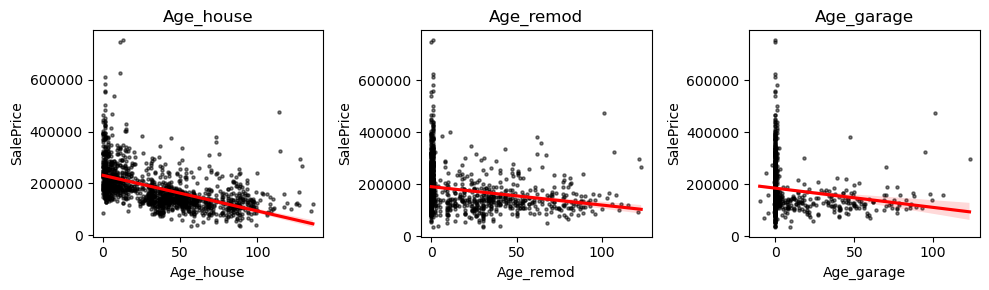

In [144]:
# Feature extraction
printmd("**feature extraction**", color="#08FC84")
printmd("**before**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

for data in x_cleaner:
    # Adding new variable (['Age_house'] from ['YrSold'] and ['YearBuilt'])
    # Adding ['Age_remod'] from ['YearRemodAdd'] and ['YearBuilt']
    # Adding ['Age_garage'] from ['GarageYrBlt'] and ['YearBuilt']
    data['Age_house']=(data['YrSold']-data['YearBuilt'])
    data['Age_remod']=(data['YearRemodAdd']-data['YearBuilt'])
    data['Age_garage']=(data['GarageYrBlt']-data['YearBuilt'])

printmd("**after**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

# Ploting new variables
fig=plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
sns.regplot(data=xy_train, x='Age_house', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_house")

plt.subplot(1,3,2)
sns.regplot(data=xy_train, x='Age_remod', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_remod")

plt.subplot(1,3,3)
sns.regplot(data=xy_train, x='Age_garage', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_garage")
fig.tight_layout()

We find a new pattern here that some property's age, remod age and garage age are 0 and 1. It is probably a new feature. We could generate new variables that explain that the feature is new

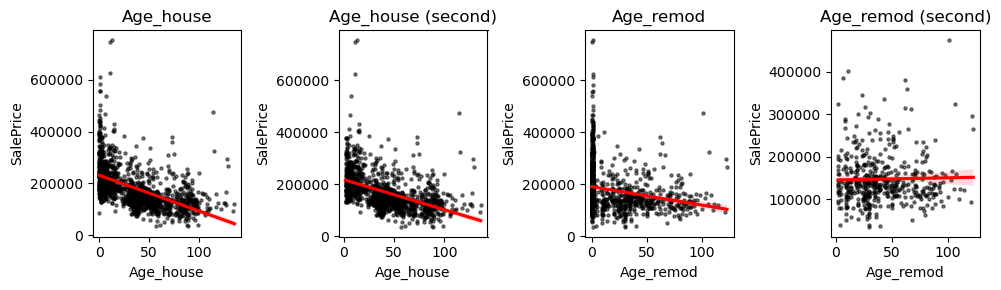

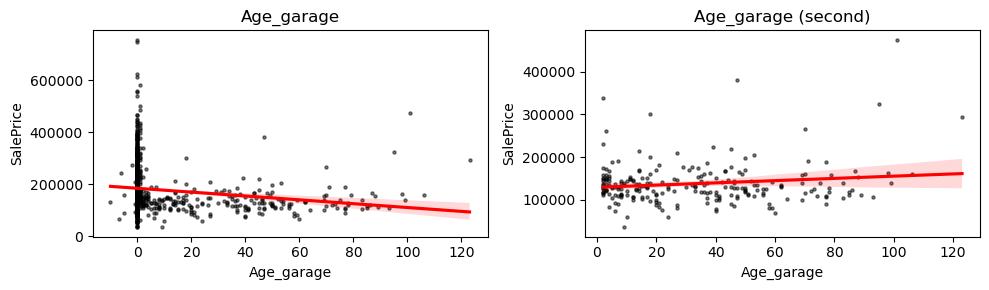

In [145]:
#1ST ROW
fig=plt.figure(figsize=(10,3))
plt.subplot(1,4,1)
sns.regplot(data=xy_train, x='Age_house', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_house")

plt.subplot(1,4,2)
sns.regplot(data=xy_train.loc[xy_train['Age_house']>1], x='Age_house', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_house (second)")

plt.subplot(1,4,3)
sns.regplot(data=xy_train, x='Age_remod', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_remod")

plt.subplot(1,4,4)
sns.regplot(data=xy_train.loc[xy_train['Age_remod']>1], x='Age_remod', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_remod (second)")
fig.tight_layout()

#2ND ROW
fig=plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.regplot(data=xy_train, x='Age_garage', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_garage")

plt.subplot(1,2,2)
sns.regplot(data=xy_train.loc[xy_train['Age_garage']>1], x='Age_garage', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_garage (second)")
fig.tight_layout()

<span style='color:#08FC84'>**feature extraction**</span>

<span style='color:#0804FC'>**before**</span>

xy_train:  (1460, 230)
x_test:  (1459, 229)


<span style='color:#0804FC'>**after**</span>

xy_train:  (1460, 233)
x_test:  (1459, 232)


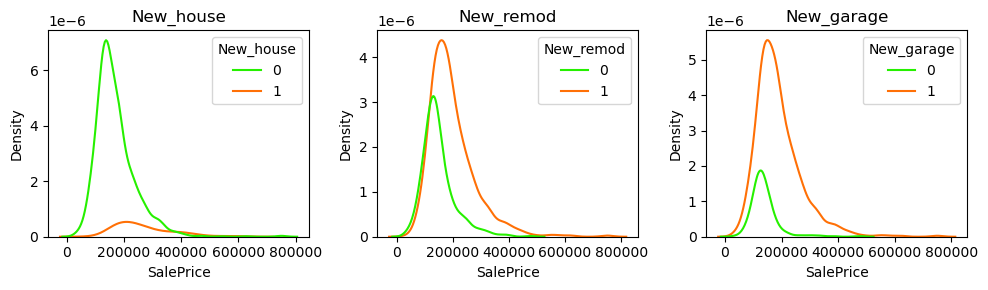

In [146]:
# Feature extraction
printmd("**feature extraction**", color="#08FC84")
printmd("**before**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

for data in x_cleaner: 
    data['New_house']=(data['Age_house']<2).astype(int)
    data['New_remod']=(data['Age_remod']<2).astype(int)
    data['New_garage']=(data['Age_garage']<2).astype(int)

printmd("**after**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

# Plotting new variables
fig=plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
sns.kdeplot(data=xy_train, x='SalePrice', hue='New_house', palette='gist_ncar')
title = plt.title("New_house")

plt.subplot(1,3,2)
sns.kdeplot(data=xy_train, x='SalePrice', hue='New_remod', palette='gist_ncar')
title = plt.title("New_remod")

plt.subplot(1,3,3)
sns.kdeplot(data=xy_train, x='SalePrice', hue='New_garage', palette='gist_ncar')
title = plt.title("New_garage")
fig.tight_layout()

Every new features has a higher average ['SalePrice'] value.

Delete:
    
    ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'] From 3 Date variables to 3 Discrete Variables

Add:

    ['Age_house', 'Age_remod', 'Age_garage']

It seems like in ['YrSold'] variable there is no inflation in house price. The house price relatively stable through time. So from this 4 original variable, I will delete all the origin variable and use new 3 variables that come from the origin

<a name='2.1.2.3.4'></a>
##### 2.1.2.3.4 Target Encoding

Applying target-encoding into train and test data would be different because target-encoding rely on the target value.

    ['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [148]:
print("['Neighborhood'] cardinality in train data:", len(xy_train['Neighborhood'].value_counts()), "\n")
print("['Neighborhood'] cardinality in test data:", len(x_test['Neighborhood'].value_counts()), "\n")
print("['Exterior1st'] cardinality in train data:", len(xy_train['Exterior1st'].value_counts()), "\n")
print("['Exterior1st'] cardinality in test data:", len(x_test['Exterior1st'].value_counts()), "\n")
print("['Exterior2nd'] cardinality in train data:", len(xy_train['Exterior2nd'].value_counts()), "\n")
print("['Exterior2nd'] cardinality in test data:", len(x_test['Exterior2nd'].value_counts()))

['Neighborhood'] cardinality in train data: 25 

['Neighborhood'] cardinality in test data: 25 

['Exterior1st'] cardinality in train data: 15 

['Exterior1st'] cardinality in test data: 13 

['Exterior2nd'] cardinality in train data: 16 

['Exterior2nd'] cardinality in test data: 15


We have more cardinality on training variables than testing variables so we won't face any problem

In [150]:
# Target Encoding function
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

# code from: https://maxhalford.github.io/blog/target-encoding/

These three variables are well distributed so I will use m=10 in target-encoding

In [152]:
# Feature extraction (Target Encoding)
printmd("**feature extraction**", color="#08FC84")
printmd("**before**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape, "\n")

print(xy_train[['Neighborhood', 'Exterior1st', 'Exterior2nd']].head(4))

# Convert ['Neighborhood'] with Target encoding
# Convert ['Exterior1st'] with Target encoding
# Convert ['Exterior2nd'] with Target encoding
xy_train['Nei_TargEncoded'] = calc_smooth_mean(xy_train, by='Neighborhood', on='SalePrice', m=10)
xy_train['Ext1st_TargEncoded'] = calc_smooth_mean(xy_train, by='Exterior1st', on='SalePrice', m=10)
xy_train['Ext2nd_TargEncoded'] = calc_smooth_mean(xy_train, by='Exterior2nd', on='SalePrice', m=10)

printmd("**after**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape, "\n")

print(xy_train[['Neighborhood', 'Nei_TargEncoded', 'Exterior1st', 'Ext1st_TargEncoded', 'Exterior2nd', 'Ext2nd_TargEncoded']].head(4))

<span style='color:#08FC84'>**feature extraction**</span>

<span style='color:#0804FC'>**before**</span>

xy_train:  (1460, 233)
x_test:  (1459, 232) 

  Neighborhood Exterior1st Exterior2nd
0      CollgCr     VinylSd     VinylSd
1      Veenker     MetalSd     MetalSd
2      CollgCr     VinylSd     VinylSd
3      Crawfor     Wd Sdng     Wd Shng


<span style='color:#0804FC'>**after**</span>

xy_train:  (1460, 236)
x_test:  (1459, 232) 

  Neighborhood  Nei_TargEncoded Exterior1st  Ext1st_TargEncoded Exterior2nd  \
0      CollgCr    196900.487243     VinylSd       213107.916112     VinylSd   
1      Veenker    211224.378995     MetalSd       150791.699821     MetalSd   
2      CollgCr    196900.487243     VinylSd       213107.916112     VinylSd   
3      Crawfor    205755.294408     Wd Sdng       151280.513699     Wd Shng   

   Ext2nd_TargEncoded  
0       213780.490192  
1       151192.370352  
2       213780.490192  
3       165410.665811  


In [153]:
# Feature extraction (Target Encoding)
printmd("**feature extraction**", color="#08FC84")
printmd("**before**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape, "\n")

print(x_test[['Neighborhood', 'Exterior1st', 'Exterior2nd']].head(4))

# Applying on the x_test data
# Creating new empty column in x_test to match xy_train
x_test = x_test.assign(Nei_TargEncoded=None)
x_test = x_test.assign(Ext1st_TargEncoded=None)
x_test = x_test.assign(Ext2nd_TargEncoded=None)

# Creating dictionary from xy_train
dict1 = xy_train[['Neighborhood', 'Nei_TargEncoded']]
dict1['Neighborhood'] = dict1['Neighborhood'].drop_duplicates()
dict1['Nei_TargEncoded'] = dict1['Nei_TargEncoded'].drop_duplicates()
dict1 = pd.DataFrame.dropna(dict1, axis=0)
dict1 = dict1.set_index('Neighborhood')['Nei_TargEncoded'].to_dict()

# Creating dictionary from xy_train
dict2 = xy_train[['Exterior1st', 'Ext1st_TargEncoded']]
dict2['Exterior1st'] = dict2['Exterior1st'].drop_duplicates()
dict2['Ext1st_TargEncoded'] = dict2['Ext1st_TargEncoded'].drop_duplicates()
dict2 = pd.DataFrame.dropna(dict2, axis=0)
dict2 = dict2.set_index('Exterior1st')['Ext1st_TargEncoded'].to_dict()

# Creating dictionary from xy_train
dict3 = xy_train[['Exterior2nd', 'Ext2nd_TargEncoded']]
dict3['Exterior2nd'] = dict3['Exterior2nd'].drop_duplicates()
dict3['Ext2nd_TargEncoded'] = dict3['Ext2nd_TargEncoded'].drop_duplicates()
dict3 = pd.DataFrame.dropna(dict3, axis=0)
dict3 = dict3.set_index('Exterior2nd')['Ext2nd_TargEncoded'].to_dict()

# Applying the dictionary from xy_train to the x_test using map
x_test['Nei_TargEncoded'] = x_test['Nei_TargEncoded'].fillna(xy_train['Neighborhood'].map(dict1))
x_test['Ext1st_TargEncoded'] = x_test['Ext1st_TargEncoded'].fillna(xy_train['Exterior1st'].map(dict2))
x_test['Ext2nd_TargEncoded'] = x_test['Ext2nd_TargEncoded'].fillna(xy_train['Exterior2nd'].map(dict3))

printmd("**after**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape, "\n")

print(x_test[['Neighborhood', 'Nei_TargEncoded', 'Exterior1st', 'Ext1st_TargEncoded', 'Exterior2nd', 'Ext2nd_TargEncoded']].head(4))

<span style='color:#08FC84'>**feature extraction**</span>

<span style='color:#0804FC'>**before**</span>

xy_train:  (1460, 236)
x_test:  (1459, 232) 

  Neighborhood Exterior1st Exterior2nd
0        NAmes     VinylSd     VinylSd
1        NAmes     Wd Sdng     Wd Sdng
2      Gilbert     VinylSd     VinylSd
3      Gilbert     VinylSd     VinylSd


<span style='color:#0804FC'>**after**</span>

xy_train:  (1460, 236)
x_test:  (1459, 235) 

  Neighborhood  Nei_TargEncoded Exterior1st  Ext1st_TargEncoded Exterior2nd  \
0        NAmes    196900.487243     VinylSd       213107.916112     VinylSd   
1        NAmes    211224.378995     Wd Sdng       150791.699821     Wd Sdng   
2      Gilbert    196900.487243     VinylSd       213107.916112     VinylSd   
3      Gilbert    205755.294408     VinylSd       151280.513699     VinylSd   

   Ext2nd_TargEncoded  
0       213780.490192  
1       151192.370352  
2       213780.490192  
3       165410.665811  


In [154]:
# For doing feature engineering of training and test data at the same time
x_cleaner = [xy_train, x_test]

In [155]:
# Feature extraction
printmd("**feature extraction**", color="#08FC84")
printmd("**before**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

# Dropping ['Neighborhood', 'Exterior1st', 'Exterior2nd']
for data in x_cleaner:
    data.drop('Neighborhood', axis=1, inplace=True)
    data.drop('Exterior1st', axis=1, inplace=True)
    data.drop('Exterior2nd', axis=1, inplace=True)

printmd("**after**", color="#0804FC")
print("xy_train: ", xy_train.shape)
print("x_test: ", x_test.shape)

<span style='color:#08FC84'>**feature extraction**</span>

<span style='color:#0804FC'>**before**</span>

xy_train:  (1460, 236)
x_test:  (1459, 235)


<span style='color:#0804FC'>**after**</span>

xy_train:  (1460, 233)
x_test:  (1459, 232) 



In [147]:
# Checking the missing values
m_train = pd.DataFrame({'x_train(Σ)': xy_train.isnull().sum(),'x_train(%)': xy_train.isnull().sum() / len(x_train) * 100})
m_train = m_train[m_train['x_train(Σ)'] > 0]
m_train.sort_values(by='x_train(Σ)', ascending=False, inplace=True)
print(f"There are {m_train.shape[0]} features having missing data in training set.")

m_test = pd.DataFrame({'x_test(Σ)': x_test.isnull().sum(),'x_test(%)': x_test.isnull().sum() / len(x_test) * 100})
m_test = m_test[m_test['x_test(Σ)'] > 0]
m_test.sort_values(by='x_test(Σ)', ascending=False, inplace=True)
print(f"There are {m_test.shape[0]} features having missing data in test set.")

missing = pd.concat([m_train, m_test], axis=1)
missing

There are 0 features having missing data in training set.
There are 0 features having missing data in test set.


Empty DataFrame
Columns: [x_train(Σ), x_train(%), x_test(Σ), x_test(%)]
Index: []

# 4. Model

In [156]:
# make a copy to safely edit in this chapter
xy_train_arr = xy_train.copy(deep=True)
x_test_arr = x_test.copy(deep=True)

# split x_train and y_train from xy_train
x_train_arr = xy_train_arr.drop(['SalePrice'], axis=1)
y_train_arr = xy_train_arr['SalePrice']
print(type(x_train_arr))
print ('x_train: ' + str(x_train_arr.shape))
print ('y_train: ' + str(y_train_arr.shape))
print ('x_train: ' + str(x_test_arr.shape) + "\n")

# Convert pandas_dataframe to numpy_array
x_train_arr = np.asanyarray(x_train_arr)
y_train_arr = np.asanyarray(y_train_arr)
x_test_arr = np.asanyarray(x_test_arr)
print(type(x_train_arr))
print ('x_train: ' + str(x_train_arr.shape))
print ('y_train: ' + str(y_train_arr.shape))
print ('x_train: ' + str(x_test_arr.shape))

<class 'pandas.core.frame.DataFrame'>
x_train: (1460, 232)
y_train: (1460,)
x_train: (1459, 232)

<class 'numpy.ndarray'>
x_train: (1460, 232)
y_train: (1460,)
x_train: (1459, 232)


<a name='4.1'></a>
## 4.1  Linear Regression

In [157]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
print("Linear Regression\n")

# Cross Validation with K=5 (80%train_train, 20%train_validation)
from sklearn.model_selection import cross_val_score
scores_r2 = cross_val_score(model1, x_train_arr, y_train_arr, cv=5, scoring=None)
print("R^2 (Cross Validation Accuracy) scores:", np.round(scores_r2, 4))
print("R^2 (Cross Validation Accuracy) scores mean: {}".format(np.round(scores_r2.mean(), 4)))
#scores_MSE = -1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_error')
#print("MSE (Cross Validation Error) scores:", np.round(scores_MSE, 2))
#print("MSE (Cross Validation Error) scores mean: {}".format(np.round(scores_MSE.mean(), 2)))
#scores_RMSE = np.sqrt(-1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_error'))
#print("RMSE (Cross Validation Error) scores:", np.round(scores_RMSE, 2))
#print("RMSE (Cross Validation Error) scores mean: {}".format(np.round(scores_RMSE.mean(), 2)))
scores_RMSLE = np.sqrt(-1 * cross_val_score(model1, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_log_error'))
print("RMSLE (Cross Validation Error) scores:", np.round(scores_RMSLE, 4))
print("RMSLE (Cross Validation Error) scores mean: {}".format(np.round(scores_RMSLE.mean(), 4)))
#scores_MAE = -1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_absolute_error')
#print("MAE (Cross Validation Error) scores:", np.round(scores_MAE, 2))
#print("MAE (Cross Validation Error) scores mean: {}".format(np.round(scores_MAE.mean(), 2)))

# Fit the model
model1.fit(x_train_arr,y_train)

# Training (100%train, 100%train)
score_r2 = model1.score(x_train_arr,y_train_arr)
print("\nR^2 (Training Accuracy) score: {}".format(np.round(score_r2, 4)))
y_train_arr_pred1 = model1.predict(x_train_arr)
#from sklearn.metrics import mean_squared_error
#score_MSE = mean_squared_error(y_train_arr, y_train_arr_pred)
#print("MSE (Training Error) score:", round(score_MSE, 2))
#from sklearn.metrics import mean_squared_error
#score_RMSE = mean_squared_error(y_train_arr, y_train_arr_pred, squared=False)
#print("RSME (Training Error) score:", round(score_RMSE, 2))
from sklearn.metrics import mean_squared_log_error
score_RMSLE = mean_squared_log_error(y_train_arr, y_train_arr_pred1, squared=False)
print("RMSLE (Training Error) score:", round(score_RMSLE, 4))
#from sklearn.metrics import mean_absolute_error
#score_MAE = mean_absolute_error(y_train_arr, y_train_arr_pred)
#print("MAE (Training Error) score:", round(score_MAE, 2))

# Predict the model
y_test_pred1 = model1.predict(x_test_arr)

Linear Regression

R^2 (Cross Validation Accuracy) scores: [0.8587 0.8255 0.8167 0.8843 0.6767]
R^2 (Cross Validation Accuracy) scores mean: 0.8124
RMSLE (Cross Validation Error) scores: [   nan    nan    nan    nan 0.1623]
RMSLE (Cross Validation Error) scores mean: nan

R^2 (Training Accuracy) score: 0.9227
RMSLE (Training Error) score: 0.1208


In [145]:
# Convert the y_test for submission
y_submission1 = pd.DataFrame(y_test_pred1)
x_submission1 = x_test['Id']
x_submission1 = pd.DataFrame(x_submission1)
submission1 = x_submission1.join(y_submission1, how='outer')
submission1 = submission1[0:1459]
submission1 = submission1.rename(columns={0:'SalePrice'})
submission1.to_csv('submission1 (Linear Regression).csv', index = False)
print("y_test_pred1 preview:")
submission1.head(3)

y_test_pred1 preview:


Id      SalePrice
0  1461  109618.311898
1  1462  171114.225043
2  1463  184092.026086

<a name='4.2'></a>
## 4.2 Lasso Regression

In [158]:
from sklearn.linear_model import Lasso
model2 = Lasso(alpha = 10)
print("Lasso Regression\n")

# Cross Validation with K=5 (80%train_train, 20%train_validation)
from sklearn.model_selection import cross_val_score
scores_r2 = cross_val_score(model2, x_train_arr, y_train_arr, cv=5, scoring=None)
print("R^2 (Cross Validation Accuracy) scores:", np.round(scores_r2, 4))
print("R^2 (Cross Validation Accuracy) scores mean: {}".format(np.round(scores_r2.mean(), 4)))
#scores_MSE = -1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_error')
#print("MSE (Cross Validation Error) scores:", np.round(scores_MSE, 2))
#print("MSE (Cross Validation Error) scores mean: {}".format(np.round(scores_MSE.mean(), 2)))
#scores_RMSE = np.sqrt(-1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_error'))
#print("RMSE (Cross Validation Error) scores:", np.round(scores_RMSE, 2))
#print("RMSE (Cross Validation Error) scores mean: {}".format(np.round(scores_RMSE.mean(), 2)))
scores_RMSLE = np.sqrt(-1 * cross_val_score(model2, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_log_error'))
print("RMSLE (Cross Validation Error) scores:", np.round(scores_RMSLE, 4))
print("RMSLE (Cross Validation Error) scores mean: {}".format(np.round(scores_RMSLE.mean(), 4)))
#scores_MAE = -1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_absolute_error')
#print("MAE (Cross Validation Error) scores:", np.round(scores_MAE, 2))
#print("MAE (Cross Validation Error) scores mean: {}".format(np.round(scores_MAE.mean(), 2)))

# Fit the model
model2.fit(x_train_arr,y_train)

# Training (100%train, 100%train)
score_r2 = model2.score(x_train_arr,y_train_arr)
print("\nR^2 (Training Accuracy) score: {}".format(np.round(score_r2, 4)))
y_train_arr_pred2 = model2.predict(x_train_arr)
#from sklearn.metrics import mean_squared_error
#score_MSE = mean_squared_error(y_train_arr, y_train_arr_pred)
#print("MSE (Training Error) score:", round(score_MSE, 2))
#from sklearn.metrics import mean_squared_error
#score_RMSE = mean_squared_error(y_train_arr, y_train_arr_pred, squared=False)
#print("RSME (Training Error) score:", round(score_RMSE, 2))
from sklearn.metrics import mean_squared_log_error
score_RMSLE = mean_squared_log_error(y_train_arr, y_train_arr_pred2, squared=False)
print("RMSLE (Training Error) score:", round(score_RMSLE, 4))
#from sklearn.metrics import mean_absolute_error
#score_MAE = mean_absolute_error(y_train_arr, y_train_arr_pred)
#print("MAE (Training Error) score:", round(score_MAE, 2))

# Predict the model
y_test_pred2 = model2.predict(x_test_arr)

Lasso Regression

R^2 (Cross Validation Accuracy) scores: [0.9039 0.8239 0.8247 0.8868 0.6924]
R^2 (Cross Validation Accuracy) scores mean: 0.8263
RMSLE (Cross Validation Error) scores: [0.135     nan    nan 0.1758 0.1602]
RMSLE (Cross Validation Error) scores mean: nan

R^2 (Training Accuracy) score: 0.9214
RMSLE (Training Error) score: 0.1193


In [147]:
# Convert the y_test for submission
y_submission2 = pd.DataFrame(y_test_pred2)
x_submission2 = x_test['Id']
x_submission2 = pd.DataFrame(x_submission2)
submission2 = x_submission2.join(y_submission2, how='outer')
submission2 = submission2[0:1459]
submission2 = submission2.rename(columns={0:'SalePrice'})
submission2.to_csv('submission2 (Lasso Regression).csv', index = False)
print("y_test_pred2 preview:")
submission2.head(3)

y_test_pred2 preview:


Id      SalePrice
0  1461  108463.915800
1  1462  163223.754248
2  1463  181984.071313

<a name='4.3'></a>
## 4.3  Ridge Regression

In [148]:
from sklearn.linear_model import Ridge
model3 = Ridge(alpha=10)
print("Ridge Regression\n")

# Cross Validation with K=5 (80%train_train, 20%train_validation)
from sklearn.model_selection import cross_val_score
scores_r2 = cross_val_score(model3, x_train_arr, y_train_arr, cv=5, scoring=None)
print("R^2 (Cross Validation Accuracy) scores:", np.round(scores_r2, 4))
print("R^2 (Cross Validation Accuracy) scores mean: {}".format(np.round(scores_r2.mean(), 4)))
#scores_MSE = -1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_error')
#print("MSE (Cross Validation Error) scores:", np.round(scores_MSE, 2))
#print("MSE (Cross Validation Error) scores mean: {}".format(np.round(scores_MSE.mean(), 2)))
#scores_RMSE = np.sqrt(-1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_error'))
#print("RMSE (Cross Validation Error) scores:", np.round(scores_RMSE, 2))
#print("RMSE (Cross Validation Error) scores mean: {}".format(np.round(scores_RMSE.mean(), 2)))
scores_RMSLE = np.sqrt(-1 * cross_val_score(model3, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_log_error'))
print("RMSLE (Cross Validation Error) scores:", np.round(scores_RMSLE, 4))
print("RMSLE (Cross Validation Error) scores mean: {}".format(np.round(scores_RMSLE.mean(), 4)))
#scores_MAE = -1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_absolute_error')
#print("MAE (Cross Validation Error) scores:", np.round(scores_MAE, 2))
#print("MAE (Cross Validation Error) scores mean: {}".format(np.round(scores_MAE.mean(), 2)))

# Fit the model
model3.fit(x_train_arr,y_train)

# Training (100%train, 100%train)
score_r2 = model3.score(x_train_arr,y_train_arr)
print("\nR^2 (Training Accuracy) score: {}".format(np.round(score_r2, 4)))
y_train_arr_pred3 = model3.predict(x_train_arr)
#from sklearn.metrics import mean_squared_error
#score_MSE = mean_squared_error(y_train_arr, y_train_arr_pred)
#print("MSE (Training Error) score:", round(score_MSE, 2))
#from sklearn.metrics import mean_squared_error
#score_RMSE = mean_squared_error(y_train_arr, y_train_arr_pred, squared=False)
#print("RSME (Training Error) score:", round(score_RMSE, 2))
from sklearn.metrics import mean_squared_log_error
score_RMSLE = mean_squared_log_error(y_train_arr, y_train_arr_pred3, squared=False)
print("RMSLE (Training Error) score:", round(score_RMSLE, 4))
#from sklearn.metrics import mean_absolute_error
#score_MAE = mean_absolute_error(y_train_arr, y_train_arr_pred)
#print("MAE (Training Error) score:", round(score_MAE, 2))

# Predict the model
y_test_pred3 = model3.predict(x_test_arr)

Ridge Regression

R^2 (Cross Validation Accuracy) scores: [0.9042 0.8062 0.8566 0.8696 0.6853]
R^2 (Cross Validation Accuracy) scores mean: 0.8244
RMSLE (Cross Validation Error) scores: [0.143  0.1607 0.1684 0.1542 0.1613]
RMSLE (Cross Validation Error) scores mean: 0.1575

R^2 (Training Accuracy) score: 0.8787
RMSLE (Training Error) score: 0.1347


In [149]:
# Convert the y_test for submission
y_submission3 = pd.DataFrame(y_test_pred3)
x_submission3 = x_test['Id']
x_submission3 = pd.DataFrame(x_submission3)
submission3 = x_submission3.join(y_submission3, how='outer')
submission3 = submission3[0:1459]
submission3 = submission3.rename(columns={0:'SalePrice'})
submission3.to_csv('submission3 (Ridge Regression).csv', index = False)
print("y_test_pred3 preview:")
submission3.head(3)

y_test_pred3 preview:


Id      SalePrice
0  1461   97048.765472
1  1462  154491.163745
2  1463  168368.665842

<a name='4.4'></a>
## 4.4 Random Forest Regression

In [154]:
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor()
print("Random Forest Regression\n")

# Cross Validation with K=5 (80%train_train, 20%train_validation)
from sklearn.model_selection import cross_val_score
scores_r2 = cross_val_score(model4, x_train_arr, y_train_arr, cv=5, scoring=None)
print("R^2 (Cross Validation Accuracy) scores:", np.round(scores_r2, 4))
print("R^2 (Cross Validation Accuracy) scores mean: {}".format(np.round(scores_r2.mean(), 4)))
#scores_MSE = -1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_error')
#print("MSE (Cross Validation Error) scores:", np.round(scores_MSE, 2))
#print("MSE (Cross Validation Error) scores mean: {}".format(np.round(scores_MSE.mean(), 2)))
#scores_RMSE = np.sqrt(-1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_error'))
#print("RMSE (Cross Validation Error) scores:", np.round(scores_RMSE, 2))
#print("RMSE (Cross Validation Error) scores mean: {}".format(np.round(scores_RMSE.mean(), 2)))
scores_RMSLE = np.sqrt(-1 * cross_val_score(model4, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_log_error'))
print("RMSLE (Cross Validation Error) scores:", np.round(scores_RMSLE, 4))
print("RMSLE (Cross Validation Error) scores mean: {}".format(np.round(scores_RMSLE.mean(), 4)))
#scores_MAE = -1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_absolute_error')
#print("MAE (Cross Validation Error) scores:", np.round(scores_MAE, 2))
#print("MAE (Cross Validation Error) scores mean: {}".format(np.round(scores_MAE.mean(), 2)))

# Fit the model
model4.fit(x_train_arr,y_train)

# Training (100%train, 100%train)
score_r2 = model4.score(x_train_arr,y_train_arr)
print("\nR^2 (Training Accuracy) score: {}".format(np.round(score_r2, 4)))
y_train_arr_pred4 = model4.predict(x_train_arr)
#from sklearn.metrics import mean_squared_error
#score_MSE = mean_squared_error(y_train_arr, y_train_arr_pred)
#print("MSE (Training Error) score:", round(score_MSE, 2))
#from sklearn.metrics import mean_squared_error
#score_RMSE = mean_squared_error(y_train_arr, y_train_arr_pred, squared=False)
#print("RSME (Training Error) score:", round(score_RMSE, 2))
from sklearn.metrics import mean_squared_log_error
score_RMSLE = mean_squared_log_error(y_train_arr, y_train_arr_pred4, squared=False)
print("RMSLE (Training Error) score:", round(score_RMSLE, 4))
#from sklearn.metrics import mean_absolute_error
#score_MAE = mean_absolute_error(y_train_arr, y_train_arr_pred)
#print("MAE (Training Error) score:", round(score_MAE, 2))

# Predict the model
y_test_pred4 = model4.predict(x_test_arr)

Random Forest Regression

R^2 (Cross Validation Accuracy) scores: [0.867  0.8239 0.8693 0.8785 0.8113]
R^2 (Cross Validation Accuracy) scores mean: 0.85
RMSLE (Cross Validation Error) scores: [0.1394 0.1576 0.1441 0.139  0.1568]
RMSLE (Cross Validation Error) scores mean: 0.1474

R^2 (Training Accuracy) score: 0.9804
RMSLE (Training Error) score: 0.0587


In [155]:
# Convert the y_test for submission
y_submission4 = pd.DataFrame(y_test_pred4)
x_submission4 = x_test['Id']
x_submission4 = pd.DataFrame(x_submission4)
submission4 = x_submission4.join(y_submission4, how='outer')
submission4 = submission4[0:1459]
submission4 = submission4.rename(columns={0:'SalePrice'})
submission4.to_csv('submission4 (Random Forest Regression).csv', index = False)
print("y_test_pred4 preview:")
submission4.head(3)

y_test_pred4 preview:


Id  SalePrice
0  1461  127225.00
1  1462  152195.32
2  1463  183756.40

<a name='4.5'></a>
## 4.5 XGBoost

In [133]:
# n_estimators=2100, acc=0.13533, train_acc=0.985
# n_estimators=1000, acc=0.13497, train_acc=0.972
# n_estimators=100, acc=0.16849, train_acc=0.889
# n_estimators=1000, learning_rate=0.05, acc=0.13497, train_acc=0.972
# n_estimators=1000, learning_rate=0.02, acc=0.13846, train_acc=0.952

In [156]:
from xgboost import XGBRegressor
model5 = XGBRegressor(learning_rate=0.02,
                   n_estimators=1000,
                   max_depth=2,
                   min_child_weight=2,
                   gamma=0,
                   subsample=0.65,
                   colsample_bytree=0.46,
                   nthread=-1,
                   scale_pos_weight=1,
                   reg_alpha=0.464,
                   reg_lambda=0.8571,
                   silent=1,
                   random_state=7,
                   n_jobs=2)
print("XGBoost Regression\n")

# Cross Validation with K=5 (80%train_train, 20%train_validation)
from sklearn.model_selection import cross_val_score
scores_r2 = cross_val_score(model5, x_train_arr, y_train_arr, cv=5, scoring=None)
print("R^2 (Cross Validation Accuracy) scores:", np.round(scores_r2, 4))
print("R^2 (Cross Validation Accuracy) scores mean: {}".format(np.round(scores_r2.mean(), 4)))
#scores_MSE = -1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_error')
#print("MSE (Cross Validation Error) scores:", np.round(scores_MSE, 2))
#print("MSE (Cross Validation Error) scores mean: {}".format(np.round(scores_MSE.mean(), 2)))
#scores_RMSE = np.sqrt(-1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_error'))
#print("RMSE (Cross Validation Error) scores:", np.round(scores_RMSE, 2))
#print("RMSE (Cross Validation Error) scores mean: {}".format(np.round(scores_RMSE.mean(), 2)))
scores_RMSLE = np.sqrt(-1 * cross_val_score(model5, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_log_error'))
print("RMSLE (Cross Validation Error) scores:", np.round(scores_RMSLE, 4))
print("RMSLE (Cross Validation Error) scores mean: {}".format(np.round(scores_RMSLE.mean(), 4)))
#scores_MAE = -1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_absolute_error')
#print("MAE (Cross Validation Error) scores:", np.round(scores_MAE, 2))
#print("MAE (Cross Validation Error) scores mean: {}".format(np.round(scores_MAE.mean(), 2)))

# Fit the model
model5.fit(x_train_arr,y_train)

# Training (100%train, 100%train)
score_r2 = model5.score(x_train_arr,y_train_arr)
print("\nR^2 (Training Accuracy) score: {}".format(np.round(score_r2, 4)))
y_train_arr_pred5 = model5.predict(x_train_arr)
#from sklearn.metrics import mean_squared_error
#score_MSE = mean_squared_error(y_train_arr, y_train_arr_pred)
#print("MSE (Training Error) score:", round(score_MSE, 2))
#from sklearn.metrics import mean_squared_error
#score_RMSE = mean_squared_error(y_train_arr, y_train_arr_pred, squared=False)
#print("RSME (Training Error) score:", round(score_RMSE, 2))
from sklearn.metrics import mean_squared_log_error
score_RMSLE = mean_squared_log_error(y_train_arr, y_train_arr_pred5, squared=False)
print("RMSLE (Training Error) score:", round(score_RMSLE, 4))
#from sklearn.metrics import mean_absolute_error
#score_MAE = mean_absolute_error(y_train_arr, y_train_arr_pred)
#print("MAE (Training Error) score:", round(score_MAE, 2))

# Predict the model
y_test_pred5 = model5.predict(x_test_arr)

XGBoost Regression

R^2 (Cross Validation Accuracy) scores: [0.8946 0.7908 0.9021 0.9192 0.8478]
R^2 (Cross Validation Accuracy) scores mean: 0.8709
RMSLE (Cross Validation Error) scores: [0.1186 0.1536 0.1324 0.1178 0.1387]
RMSLE (Cross Validation Error) scores mean: 0.1322

R^2 (Training Accuracy) score: 0.9526
RMSLE (Training Error) score: 0.102


In [157]:
# Convert the y_test for submission
y_submission5 = pd.DataFrame(y_test_pred5)
x_submission5 = x_test['Id']
x_submission5 = pd.DataFrame(x_submission5)
submission5 = x_submission5.join(y_submission5, how='outer')
submission5 = submission5[0:1459]
submission5 = submission5.rename(columns={0:'SalePrice'})
submission5.to_csv('submission5 (XGBoost Regression).csv', index = False)
print("y_test_pred5 preview:")
submission5.head(3)

y_test_pred5 preview:


Id      SalePrice
0  1461  118992.421875
1  1462  162650.375000
2  1463  183583.546875

<a name='4.6'></a>
## 4.6 Lightgbm

In [169]:
from lightgbm import LGBMRegressor
model6 = LGBMRegressor(objective='regression',
                    learning_rate=0.05,
                    n_estimators=500)
print("Lightgbm Regression\n")

# Cross Validation with K=5 (80%train_train, 20%train_validation)
from sklearn.model_selection import cross_val_score
scores_r2 = cross_val_score(model6, x_train_arr, y_train_arr, cv=5, scoring=None)
print("R^2 (Cross Validation Accuracy) scores:", np.round(scores_r2, 4))
print("R^2 (Cross Validation Accuracy) scores mean: {}".format(np.round(scores_r2.mean(), 4)))
#scores_MSE = -1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_error')
#print("MSE (Cross Validation Error) scores:", np.round(scores_MSE, 2))
#print("MSE (Cross Validation Error) scores mean: {}".format(np.round(scores_MSE.mean(), 2)))
#scores_RMSE = np.sqrt(-1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_error'))
#print("RMSE (Cross Validation Error) scores:", np.round(scores_RMSE, 2))
#print("RMSE (Cross Validation Error) scores mean: {}".format(np.round(scores_RMSE.mean(), 2)))
scores_RMSLE = np.sqrt(-1 * cross_val_score(model6, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_log_error'))
print("RMSLE (Cross Validation Error) scores:", np.round(scores_RMSLE, 4))
print("RMSLE (Cross Validation Error) scores mean: {}".format(np.round(scores_RMSLE.mean(), 4)))
#scores_MAE = -1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_absolute_error')
#print("MAE (Cross Validation Error) scores:", np.round(scores_MAE, 2))
#print("MAE (Cross Validation Error) scores mean: {}".format(np.round(scores_MAE.mean(), 2)))

# Fit the model
model6.fit(x_train_arr,y_train)

# Training (100%train, 100%train)
score_r2 = model6.score(x_train_arr,y_train_arr)
print("\nR^2 (Training Accuracy) score: {}".format(np.round(score_r2, 4)))
y_train_arr_pred6 = model6.predict(x_train_arr)
#from sklearn.metrics import mean_squared_error
#score_MSE = mean_squared_error(y_train_arr, y_train_arr_pred)
#print("MSE (Training Error) score:", round(score_MSE, 2))
#from sklearn.metrics import mean_squared_error
#score_RMSE = mean_squared_error(y_train_arr, y_train_arr_pred, squared=False)
#print("RSME (Training Error) score:", round(score_RMSE, 2))
from sklearn.metrics import mean_squared_log_error
score_RMSLE = mean_squared_log_error(y_train_arr, y_train_arr_pred6, squared=False)
print("RMSLE (Training Error) score:", round(score_RMSLE, 4))
#from sklearn.metrics import mean_absolute_error
#score_MAE = mean_absolute_error(y_train_arr, y_train_arr_pred)
#print("MAE (Training Error) score:", round(score_MAE, 2))

# Predict the model
y_test_pred6 = model6.predict(x_test_arr)

Lightgbm Regression

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3153
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 153
[LightGBM] [Info] Start training from score 180717.091610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3168
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 155
[LightGBM] [Info] Start training from score 180407.575342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002954 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3151
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 

In [159]:
# Convert the y_test for submission
y_submission6 = pd.DataFrame(y_test_pred6)
x_submission6 = x_test['Id']
x_submission6 = pd.DataFrame(x_submission6)
submission6 = x_submission6.join(y_submission6, how='outer')
submission6 = submission6[0:1459]
submission6 = submission6.rename(columns={0:'SalePrice'})
submission6.to_csv('submission6 (Lightgbm Regression).csv', index = False)
print("y_test_pred6 preview:")
submission6.head(3)

y_test_pred6 preview:


Id      SalePrice
0  1461  129562.598091
1  1462  156122.799450
2  1463  180569.267222

<a name='4.7'></a>
## 4.7 CatBoost Regressor

    iterations 7000, 0.13057
    iterations 5000, 0.13053
    iterations 2000, 0.13047
    iterations 1500, 0.13003
    iterations 1000, 0.12921
    iterations  700, 0.12889
    iterations  500, 0.12921
        
        iterations  700, 12889, learning_rate=0.04, 0.1230
        iterations  700, 12889, learning_rate=0.05, 0.1220, 0.12889
        iterations  700, 12889, learning_rate=0.06, 0.1242
                
                iterations  700, 12889, learning_rate=0.05, depth=4, 0.1248
                iterations  700, 12889, learning_rate=0.05, depth=5, 0.1222, 0.12979
                iterations  700, 12889, learning_rate=0.05, depth=6, 0.1220, 0.12889
                iterations  700, 12889, learning_rate=0.05, depth=8, 0.1243
                iterations  700, 12889, learning_rate=0.05, depth=8, 0.12550
                
                    iterations  700, 12889, learning_rate=0.05, depth=6, l2_leaf_reg=0.5, 0.1237
                    iterations  700, 12889, learning_rate=0.05, depth=6, l2_leaf_reg=0.8, 0.1226
                    iterations  700, 12889, learning_rate=0.05, depth=6, l2_leaf_reg=0.9, 0.1231
                    iterations  700, 12889, learning_rate=0.05, depth=6, l2_leaf_reg=  1, 0.1224, 0.13257
                    iterations  700, 12889, learning_rate=0.05, depth=6, l2_leaf_reg=1.1, 0.1231
                    iterations  700, 12889, learning_rate=0.05, depth=6, l2_leaf_reg=1.2, 0.1225
                    iterations  700, 12889, learning_rate=0.05, depth=6, l2_leaf_reg=  2, 0.1232
                    iterations  700, 12889, learning_rate=0.05, depth=6, l2_leaf_reg=  5, 0.1228
                    iterations  700, 12889, learning_rate=0.05, depth=6, l2_leaf_reg=  10, 0.1264
                    
                iterations  700, 12889, learning_rate=0.05, depth=6, 0.1220, 0.12889
                
                after target encoding:
                iterations  700, 12889, learning_rate=0.05, depth=6, 0.1204, 0.12889

In [249]:
from catboost import CatBoostRegressor
model7 = CatBoostRegressor(iterations=700,
                          learning_rate=0.05,
                          depth=6)
print("CatBoost Regression\n")

# Cross Validation with K=5 (80%train_train, 20%train_validation)
from sklearn.model_selection import cross_val_score
scores_r2 = cross_val_score(model7, x_train_arr, y_train_arr, cv=5, scoring=None)
print("R^2 (Cross Validation Accuracy) scores:", np.round(scores_r2, 4))
print("R^2 (Cross Validation Accuracy) scores mean: {}".format(np.round(scores_r2.mean(), 4)))
#scores_MSE = -1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_error')
#print("MSE (Cross Validation Error) scores:", np.round(scores_MSE, 2))
#print("MSE (Cross Validation Error) scores mean: {}".format(np.round(scores_MSE.mean(), 2)))
#scores_RMSE = np.sqrt(-1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_error'))
#print("RMSE (Cross Validation Error) scores:", np.round(scores_RMSE, 2))
#print("RMSE (Cross Validation Error) scores mean: {}".format(np.round(scores_RMSE.mean(), 2)))
scores_RMSLE = np.sqrt(-1 * cross_val_score(model7, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_squared_log_error'))
print("RMSLE (Cross Validation Error) scores:", np.round(scores_RMSLE, 4))
print("RMSLE (Cross Validation Error) scores mean: {}".format(np.round(scores_RMSLE.mean(), 4)))
#scores_MAE = -1 * cross_val_score(model, x_train_arr, y_train_arr, cv=5, scoring='neg_mean_absolute_error')
#print("MAE (Cross Validation Error) scores:", np.round(scores_MAE, 2))
#print("MAE (Cross Validation Error) scores mean: {}".format(np.round(scores_MAE.mean(), 2)))

# Fit the model
model7.fit(x_train_arr,y_train)

# Training (100%train, 100%train)
score_r2 = model7.score(x_train_arr,y_train_arr)
print("\nR^2 (Training Accuracy) score: {}".format(np.round(score_r2, 4)))
y_train_arr_pred7 = model7.predict(x_train_arr)
#from sklearn.metrics import mean_squared_error
#score_MSE = mean_squared_error(y_train_arr, y_train_arr_pred)
#print("MSE (Training Error) score:", round(score_MSE, 2))
#from sklearn.metrics import mean_squared_error
#score_RMSE = mean_squared_error(y_train_arr, y_train_arr_pred, squared=False)
#print("RSME (Training Error) score:", round(score_RMSE, 2))
from sklearn.metrics import mean_squared_log_error
score_RMSLE = mean_squared_log_error(y_train_arr, y_train_arr_pred7, squared=False)
print("RMSLE (Training Error) score:", round(score_RMSLE, 4))
#from sklearn.metrics import mean_absolute_error
#score_MAE = mean_absolute_error(y_train_arr, y_train_arr_pred)
#print("MAE (Training Error) score:", round(score_MAE, 2))

# Predict the model
y_test_pred7 = model7.predict(x_test_arr)

CatBoost Regression

0:	learn: 78154.2870866	total: 5.46ms	remaining: 3.82s
1:	learn: 75604.3403658	total: 11.6ms	remaining: 4.07s
2:	learn: 73341.4342262	total: 17.7ms	remaining: 4.1s
3:	learn: 71205.5419302	total: 24.5ms	remaining: 4.27s
4:	learn: 69154.2674649	total: 30.2ms	remaining: 4.2s
5:	learn: 67362.9938622	total: 36.8ms	remaining: 4.26s
6:	learn: 65507.9411651	total: 43ms	remaining: 4.26s
7:	learn: 63786.4302131	total: 50ms	remaining: 4.33s
8:	learn: 61967.0101913	total: 56.6ms	remaining: 4.35s
9:	learn: 60272.5023682	total: 63.2ms	remaining: 4.36s
10:	learn: 58670.0669479	total: 69.8ms	remaining: 4.37s
11:	learn: 57108.5355554	total: 77.6ms	remaining: 4.45s
12:	learn: 55457.0739239	total: 85.3ms	remaining: 4.51s
13:	learn: 53964.9836588	total: 91ms	remaining: 4.46s
14:	learn: 52689.0076355	total: 97.9ms	remaining: 4.47s
15:	learn: 51293.3659471	total: 104ms	remaining: 4.45s
16:	learn: 50044.4757773	total: 110ms	remaining: 4.43s
17:	learn: 48836.8294280	total: 115ms	remaining

In [250]:
# Convert the y_test for submission
y_submission7 = pd.DataFrame(y_test_pred7)
x_submission7 = x_test['Id']
x_submission7 = pd.DataFrame(x_submission7)
submission7 = x_submission7.join(y_submission7, how='outer')
submission7 = submission7[0:1459]
submission7 = submission7.rename(columns={0:'SalePrice'})
submission7.to_csv('submission7 (CatBoost Regression).csv', index = False)
print("y_test_pred7 preview:")
submission7.head(3)

y_test_pred7 preview:


Id      SalePrice
0  1461  119988.659089
1  1462  165625.091887
2  1463  185883.880089

<a name='5'></a>
# 5 Conclusion

    Linear Regression
    Cross Validation Error: 0.2266
    Training Error: 0.126
    Test Error: 0.19824

    Lasso Regression
    Cross Validation Error: 0.16133
    Training Error: 0.1249
    Test Error: 0.18259

    Ridge Regression
    Cross Validation Error: 0.1575
    Training Error: 0.1347
    Test Error: 0.16393

    Random Forest Regression
    Cross Validation Error: 0.1472
    Training Error: 0.0601
    Test Error: 0.14769

    XGBoost Regression
    Cross Validation Error: 0.1322
    Training Error: 0.102
    Test Error: 0.13846

    Lightgbm Regression
    Cross Validation Error: 0.1365
    Training Error: 0.0348
    Test Error: 0.13600
    
    CatBoost Regression
    Cross Validation Error: 0.1219
    Training Error: 0.0393
    Test Error: 0.12921

From the training and testing errors, we can see that the cross validation error value always close to the test error. So rather than submiting every possible scenario results to kaggle, we could just infer the cross validation error value as the test error value.

CatBoost Regression makes the best prediction with score 0.12635 (TOP 13%) followed by Lightgbm Regression with 0.13600, XGBoost Regression with 0.13846, Random Forest Regression with 0.14769, Ridge Regression with 0.16393, Lasso Regression with 0.18259, Linear Regression with 0.19824.

Improvement still can be make by adding target-encoding to high cardinality variables, deeper EDA, and CatBoost Regression Tuning

# Contents
- [0 Case Description](#0)
- [1. Introduction and Data Preprocessing](#1)
    - [1.1 Problem Statement](#1.1)
    - [1.2 Packages](#1.2)
    - [1.3 Read or Import](#1.3)
    - [1.4 Data Summary](#1.4)
    - [1.5 Data Preparation](#1.5)
- [2. Exploratory Data Analysis](#2)
    - [2.1 Dependent/Target Variable](#2.1)
        - [2.1.1 Qualitative/Categorical Variables](#2.1.1)
            - [2.1.1.1 Transported](#2.1.1.1)
    - [2.2 Independent/Predictors Variable](#2.2)
        - [2.2.1 Quantitative/Numerical Variables](#2.2.1)
            - [2.2.1.1 Age](#2.2.1.1)
            - [2.2.1.2 RoomService](#2.2.1.2)
            - [2.2.1.3 FoodCourt](#2.2.1.3)
            - [2.2.1.4 ShoppingMall](#2.2.1.4)
            - [2.2.1.5 Spa](#2.2.1.5)
            - [2.2.1.6 VRDeck](#2.2.1.6)
            - [2.2.2.7 Notes Recap](#2.2.2.7)
        - [2.2.2 Qualitative/Categorical Variables](#2.2.2)
            - [2.2.2.1 PassengerId](#2.2.2.1)
            - [2.2.2.2 HomePlanet](#2.2.2.2)
            - [2.2.2.3 CryoSleep](#2.2.2.3)
            - [2.2.2.4 Cabin](#2.2.2.4)
            - [2.2.2.5 Destination](#2.2.2.5)
            - [2.2.2.6 VIP](#2.2.2.6)
            - [2.2.2.7 Name](#2.2.2.7)
            - [2.2.2.8 Notes Recap](#2.2.2.8)
- [3. Feature Engineering](#3)
    - [3.1 Missing Values](#3.1)
        - [3.1.1 Detect](#3.1.1)
        - [3.1.2 Observe](#3.1.2)
        - [3.1.3 Action](#3.1.3)
    - [3.2 Standardization](#3.2)
    - [3.3 Adding new variables](#3.3)
        - [3.3.1 Training Set](#3.3.1)
            - [3.3.1.1 EDA on new variables](#3.3.1.1)
        - [3.3.2 Test Set](#3.3.2)
    - [3.4 Convert Qualitative/Categorical Variables to Quantitative/Numerical Variables](#3.4)
        - [3.4.1 Training Set](#3.5.1)
        - [3.4.2 Test Set](#3.5.1)
    - [3.5 Filter with relevant variables](#3.5)
        - [3.5.1 Training Set](#3.5.1)
        - [3.5.2 Test Set](#3.5.1)
- [4. Model](#4)
    - [4.1 Linear Regression](#4.1)
    - [4.2 Lasso Regression](#4.2)
    - [4.3 Ridge Regression](#4.3)
    - [4.4 Random Forest Regression](#4.4)
    - [4.5 XGBoost Regression](#4.5)
    - [4.6 Lightgbm Regression](#4.6)
    - [4.7 CatBoost Regression](#4.7)
- [5. Conclusion](#5)